##Dependencies

In [373]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from collections import Counter
import seaborn as sns
from datetime import datetime

In [374]:
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00498/incident_event_log.zip')

In [375]:
df.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,sys_created_at,sys_updated_by,sys_updated_at,contact_type,location,category,subcategory,u_symptom,cmdb_ci,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 21,29/2/2016 01:23,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 642,29/2/2016 08:53,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 804,29/2/2016 11:29,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 908,5/3/2016 12:00,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 746,29/2/2016 04:57,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,?,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 89,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


In [376]:
# Shape of the dataset
df.shape

(141712, 36)

In [377]:
print(df.columns)

Index(['number', 'incident_state', 'active', 'reassignment_count',
       'reopen_count', 'sys_mod_count', 'made_sla', 'caller_id', 'opened_by',
       'opened_at', 'sys_created_by', 'sys_created_at', 'sys_updated_by',
       'sys_updated_at', 'contact_type', 'location', 'category', 'subcategory',
       'u_symptom', 'cmdb_ci', 'impact', 'urgency', 'priority',
       'assignment_group', 'assigned_to', 'knowledge',
       'u_priority_confirmation', 'notify', 'problem_id', 'rfc', 'vendor',
       'caused_by', 'closed_code', 'resolved_by', 'resolved_at', 'closed_at'],
      dtype='object')


Counting the datatypes 

In [378]:
from collections import Counter
Counter(df.dtypes)

Counter({dtype('bool'): 4, dtype('int64'): 3, dtype('O'): 29})

In [379]:
new_df=df.copy()

In [380]:
new_df.dtypes

number                     object
incident_state             object
active                       bool
reassignment_count          int64
reopen_count                int64
sys_mod_count               int64
made_sla                     bool
caller_id                  object
opened_by                  object
opened_at                  object
sys_created_by             object
sys_created_at             object
sys_updated_by             object
sys_updated_at             object
contact_type               object
location                   object
category                   object
subcategory                object
u_symptom                  object
cmdb_ci                    object
impact                     object
urgency                    object
priority                   object
assignment_group           object
assigned_to                object
knowledge                    bool
u_priority_confirmation      bool
notify                     object
problem_id                 object
rfc           

We can see that we have 4 Bool, 3 Int64 and 29 Object datatype 
But we can see that time series dataset is also showing as obejct we will get this into data and time dtype


# Basic Feature Analysis

Distrubution of Incident state in dataset

In [381]:
#incident_state
new_df.incident_state.value_counts()

Active                38716
New                   36407
Resolved              25751
Closed                24985
Awaiting User Info    14642
Awaiting Vendor         707
Awaiting Problem        461
Awaiting Evidence        38
-100                      5
Name: incident_state, dtype: int64

we can see thath there is 5 entries with incident state as -100

As they are very less in number we can remove them

In [382]:
new_df=new_df[new_df.incident_state!='-100']

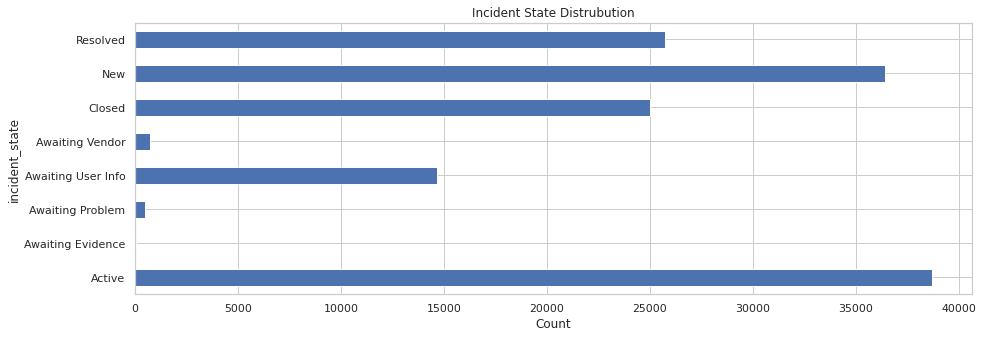

In [383]:
plt.figure(figsize=(15,5))
new_df.groupby('incident_state').count()['number'].plot(kind='barh')
plt.title('Incident State Distrubution')
plt.xlabel('Count')
plt.show()

In [384]:
new_df['incident_state'].value_counts()

Active                38716
New                   36407
Resolved              25751
Closed                24985
Awaiting User Info    14642
Awaiting Vendor         707
Awaiting Problem        461
Awaiting Evidence        38
Name: incident_state, dtype: int64

We can observe that there are alot of new and acitve entries due to repetation of Incident number.


In [385]:
Counter(new_df['number']).most_common(10)

[('INC0019396', 58),
 ('INC0044260', 56),
 ('INC0005927', 46),
 ('INC0020718', 45),
 ('INC0011206', 44),
 ('INC0007349', 43),
 ('INC0025734', 43),
 ('INC0012815', 40),
 ('INC0003419', 38),
 ('INC0020849', 38)]

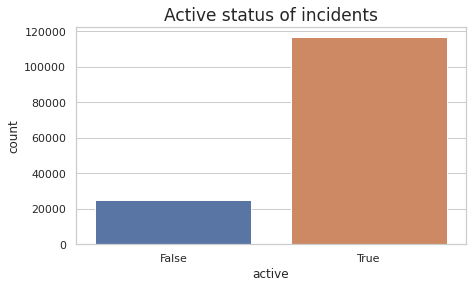

True     116721
False     24986
Name: active, dtype: int64

In [386]:
#active
plt.figure(figsize=(7,4))
sns.countplot(x='active',data=new_df)
plt.title('Active status of incidents',size=17)
plt.show()
new_df.active.value_counts()

In [387]:
print('{0} percentage of incidents are showing active'.format(round(new_df.active.value_counts()[1]/(len(new_df.active))*100,2)))

82.37 percentage of incidents are showing active


We can see that there are lots of active incidents that is beaause incident state with actie is addad when ever there is any update in the incident

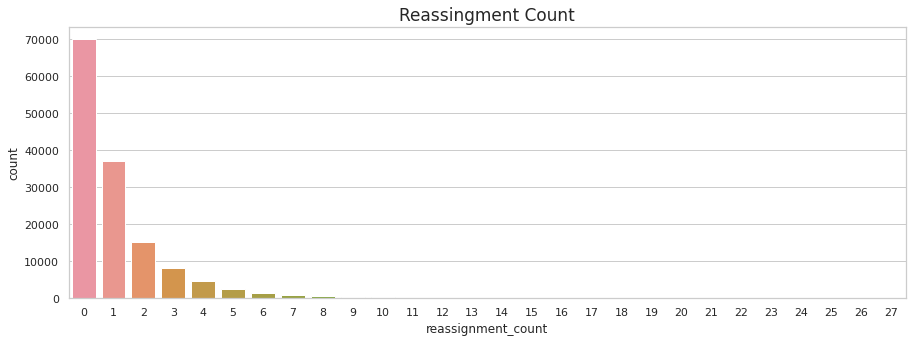

0    69874
1    37101
2    15097
3     8274
4     4614
5     2595
6     1447
7      985
8      574
9      365
Name: reassignment_count, dtype: int64

In [388]:
#reassignment_count
plt.figure(figsize=(15,5))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="reassignment_count", data=new_df)
plt.title('Reassingment Count',size=17)
plt.show()
new_df.reassignment_count.value_counts()[:10]

max cases are not being reassinged or assingment very few number of times

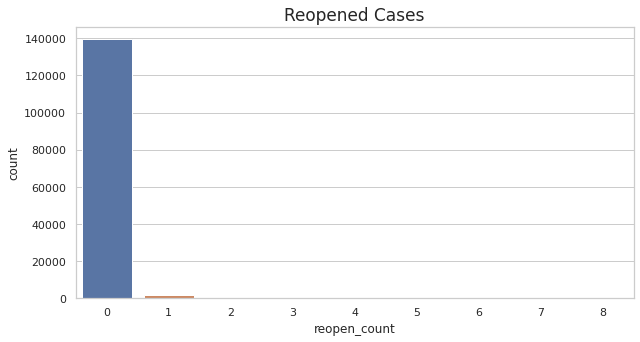

0    139393
1      1918
2       190
3       107
4        48
5        24
6        18
7         5
8         4
Name: reopen_count, dtype: int64

In [389]:
#reopend cases
plt.figure(figsize=(10,5))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="reopen_count", data=new_df)
plt.title('Reopened Cases',size=17)
plt.show()
new_df.reopen_count.value_counts()

In [390]:
print('{0} percentage of incidents are not re-opening'.format(round(new_df.reopen_count.value_counts()[0]/(len(new_df.reopen_count))*100,2)))

98.37 percentage of incidents are not re-opening


From the value count and countplot we can see that max number of cases are not being reopened and max reopening is 8 times

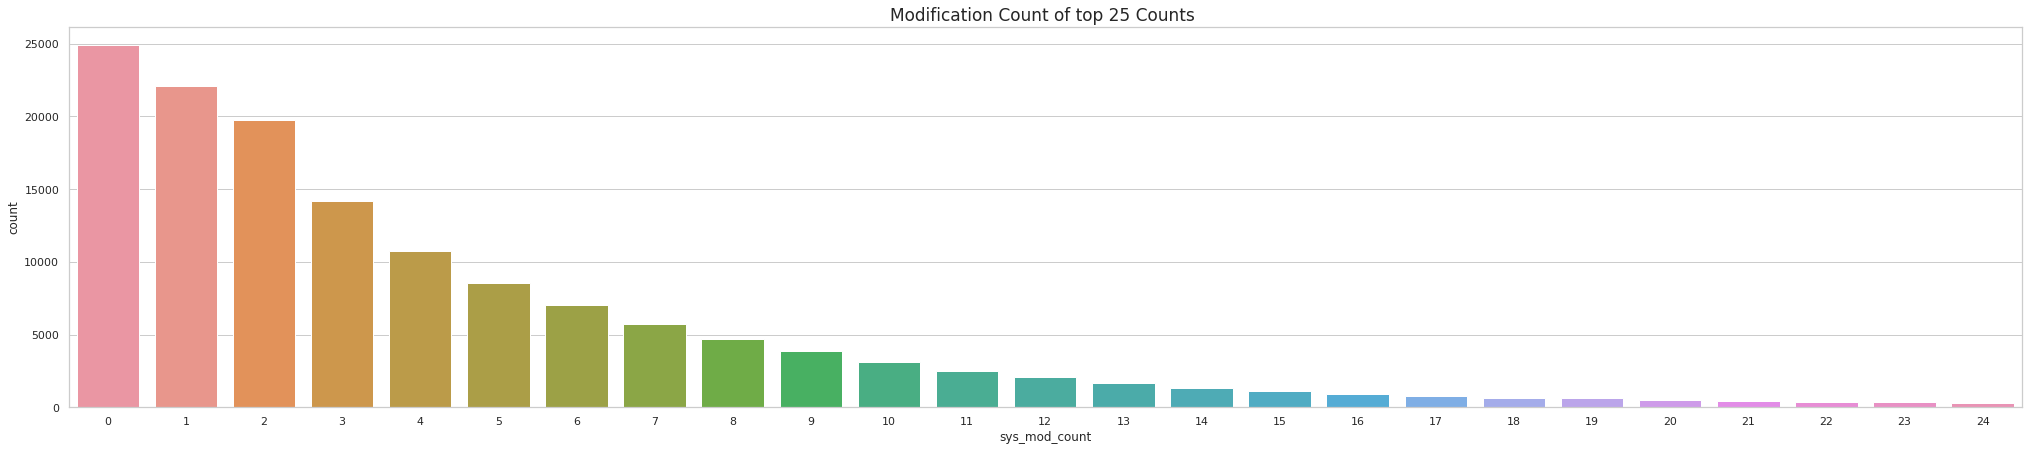

0      24913
1      22061
2      19748
3      14168
4      10735
       ...  
106        1
105        1
103        1
117        1
119        1
Name: sys_mod_count, Length: 115, dtype: int64

In [391]:
#sys_mod_count
plt.figure(figsize=(35,7))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="sys_mod_count",data=new_df,order=new_df.sys_mod_count.value_counts().iloc[:25].index)
plt.title('Modification Count of top 25 Counts ',size=17)
plt.show()
new_df.sys_mod_count.value_counts()


In [392]:
print('Maximum modification count of an Incident is',max(new_df.sys_mod_count))

Maximum modification count of an Incident is 129


We can see that after 0 modification count maximum cases are being modified atlest 1 or 2 times


SLA can only be calculated in incidents with their latest state of all the unique incidents

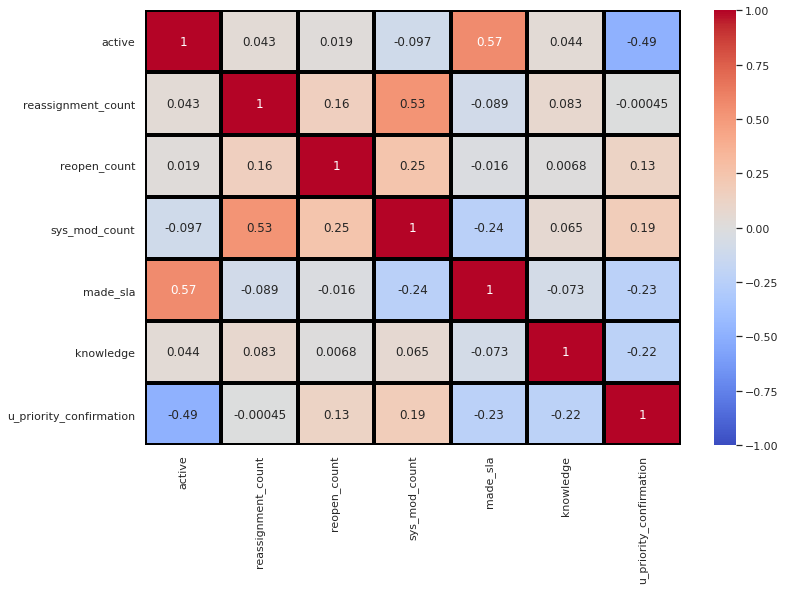

In [393]:
#SLA made
plt.figure(figsize=(12,8))
sns.heatmap(new_df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')
plt.show()

Here we can see that made_sla is coorelated with active state and reopen count


So we will find unique sla using this

In [394]:
df_sla=new_df.loc[new_df['incident_state']=='Closed']

df_sla=df_sla.sort_values('reopen_count').drop_duplicates('number', keep='last')

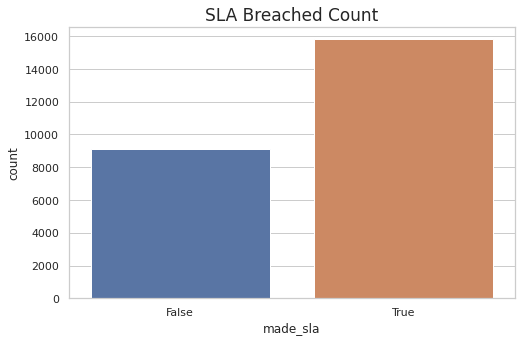

True     15803
False     9115
Name: made_sla, dtype: int64

In [395]:
plt.figure(figsize=(8,5))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="made_sla",data=df_sla)
plt.title('SLA Breached Count',size=17)
plt.show()
df_sla.made_sla.value_counts()

In [396]:
print('{0} percentage of incidents are breaching the SLA'.format(round(df_sla.made_sla.value_counts()[0]/(len(df_sla.made_sla))*100,2)))

36.58 percentage of incidents are breaching the SLA


In [397]:
#caller ID
new_df['caller_id'].value_counts()

Caller 1904    1425
Caller 290      789
Caller 4514     716
Caller 1441     322
Caller 298      293
               ... 
Caller 4282       2
Caller 188        2
Caller 1333       2
Caller 3042       2
Caller 1230       2
Name: caller_id, Length: 5245, dtype: int64

In [398]:
print('The total number of unique Caller IDs are',len(new_df.caller_id.unique()))

The total number of unique Caller IDs are 5245


CallerId does not add any value in predicting the closing data,So we can drop it

In [399]:
new_df.drop(columns=['caller_id'],axis=1,inplace=True)

In [400]:
#opened_by
new_df['opened_by'].value_counts()

Opened by  17     41463
Opened by  24      8063
Opened by  131     7269
Opened by  108     6121
Opened by  55      5655
                  ...  
Opened by  150        3
Opened by  528        3
Opened by  7          3
Opened by  486        3
Opened by  440        3
Name: opened_by, Length: 208, dtype: int64

In [401]:
print('The total number of unique Open IDs are',len(new_df.opened_by.unique()))

The total number of unique Open IDs are 208


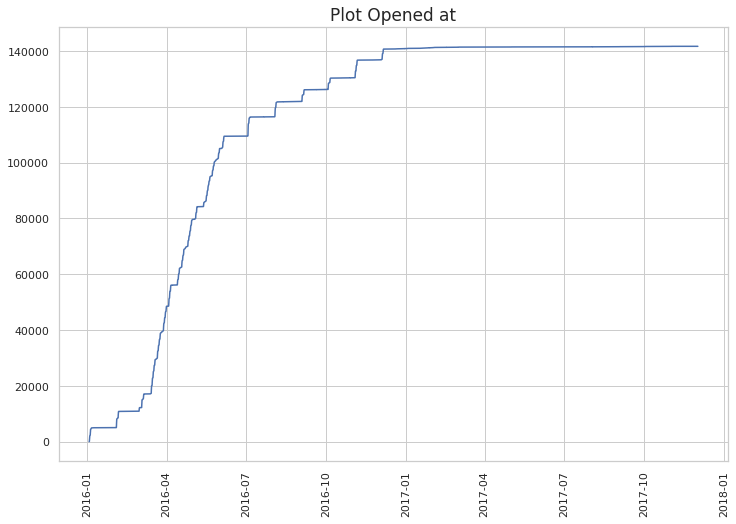

In [402]:
#plotting opened at 
new_df['opened_at']=pd.to_datetime(new_df['opened_at'])

plt.figure(figsize = (12,8))
date_df = new_df.sort_values('opened_at', ascending=True)
x=np.array(date_df.opened_at)
y=np.array(np.arange(0,len(date_df.opened_at)))
plt.plot(x,y)
plt.title('Plot Opened at',size=17)
plt.xticks(rotation='vertical')
plt.show()

we can observe that there is linear growth from 2016-01 to 2016-12 and then the growth became slow and steady

In [403]:
#sys_created_by
new_df.sys_created_by.value_counts()

?                 53076
Created by 10     24220
Created by 13      4511
Created by 62      3943
Created by 52      3551
                  ...  
Created by 194        3
Created by 60         3
Created by 73         3
Created by 209        3
Created by 191        3
Name: sys_created_by, Length: 186, dtype: int64

In [404]:
print('The total number of unique IDs are',len(new_df.sys_created_by.unique()))

The total number of unique IDs are 186


As there are more than 53k values are ? and we know that opened and created are same so we can ignore this attribute

Sys created are just unique IDs and ? values are missing we can remove this attribute also

In [405]:
new_df.drop(columns=['sys_created_by'],axis=1,inplace=True)

In [406]:
#sys_created_at
new_df.sys_created_at.value_counts()


?                  53076
4/7/2016 14:50        56
15/3/2016 15:19       52
19/4/2016 11:32       47
24/5/2016 09:14       47
                   ...  
28/3/2016 19:13        2
18/4/2016 15:35        2
16/3/2016 09:49        2
23/3/2016 11:04        2
6/4/2016 15:33         2
Name: sys_created_at, Length: 11553, dtype: int64

In [407]:
#dropping this attribute as we dont know maximum created entries
new_df.drop(columns=['sys_created_at'],axis=1,inplace=True)

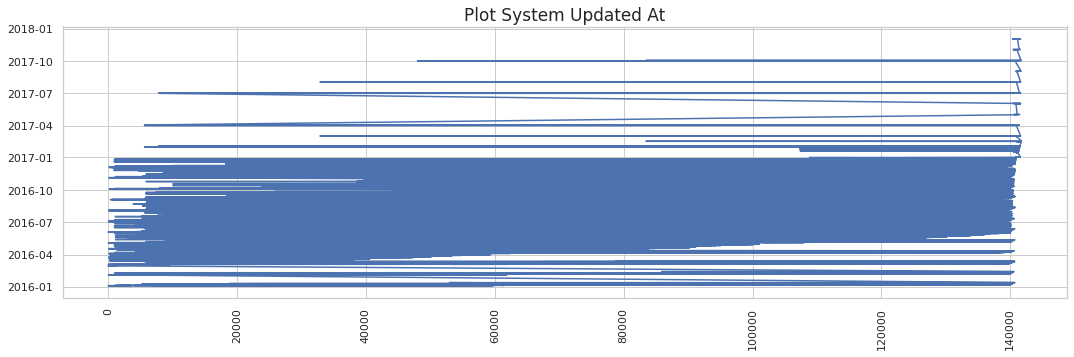

In [408]:
#sys_updated_at
new_df['sys_updated_at']=pd.to_datetime(new_df['sys_updated_at'])
plt.figure(figsize = (18,5))
date_df = new_df.sort_values('sys_updated_at', ascending=True)
plt.plot(date_df['sys_updated_at'])
plt.title('Plot System Updated At',size=17)
plt.xticks(rotation='vertical')
plt.show()


In [409]:
#there is no proper graph in updattin as its looks completely random we can drop this
new_df.drop(columns=['sys_updated_at'],axis=1,inplace=True)

In [410]:
#sys_updated_by
new_df.sys_updated_by.value_counts()

Updated by 908    36162
Updated by 44     12644
Updated by 60      7009
Updated by 429     4169
Updated by 859     2560
                  ...  
Updated by 739        1
Updated by 522        1
Updated by 268        1
Updated by 243        1
Updated by 970        1
Name: sys_updated_by, Length: 845, dtype: int64

In [411]:
print('The total number of unique Updating IDs are',len(new_df.sys_updated_by.unique()))

The total number of unique Updating IDs are 845


as this is only the update Ids, We Can remove this feature as it does not help much in prediction 

In [412]:
new_df.drop(columns=['sys_updated_by'],axis=1,inplace=True)

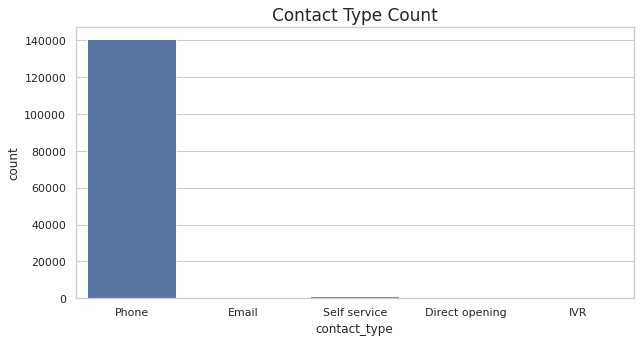

Phone             140457
Self service         995
Email                220
IVR                   18
Direct opening        17
Name: contact_type, dtype: int64

In [413]:
#contact type
plt.figure(figsize=(10,5))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="contact_type", data=new_df)
plt.title('Contact Type Count',size=17)
plt.show()
new_df.contact_type.value_counts()

Majority of Incidents are opened by Phone

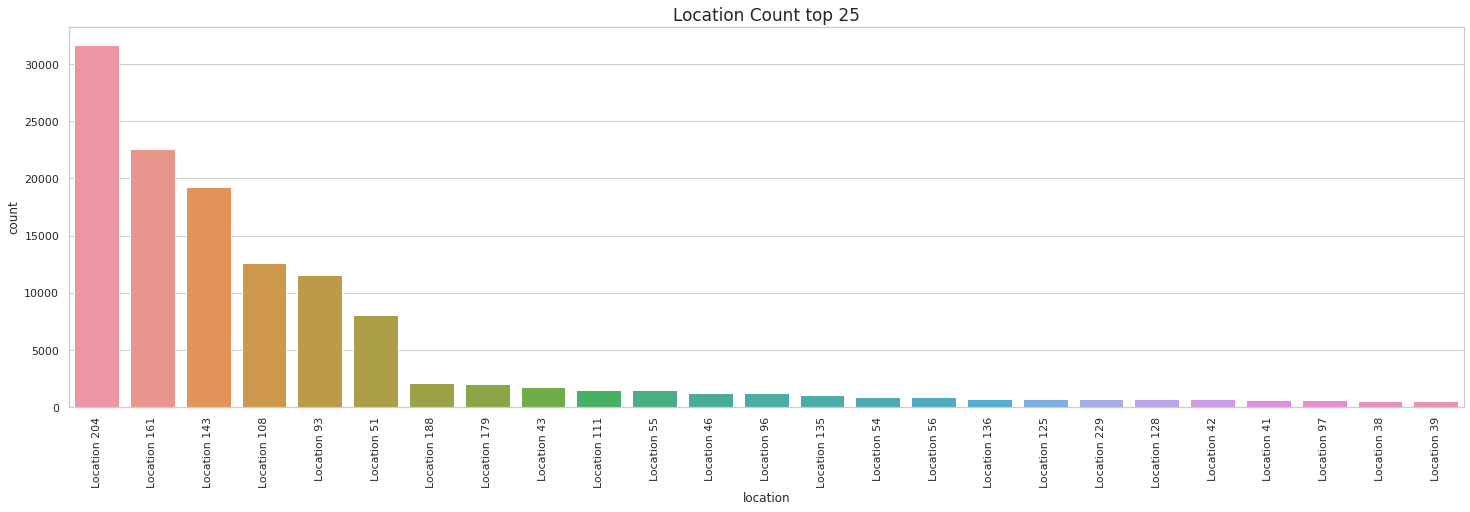


 total number of unique locations are 225


In [414]:
#Locations
plt.figure(figsize=(25,7))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="location", data=new_df,order=new_df.location.value_counts().iloc[:25].index)
plt.title('Location Count top 25',size=17)
plt.xticks(rotation='vertical')
plt.show()

print('\n total number of unique locations are',len(new_df.location.unique()))

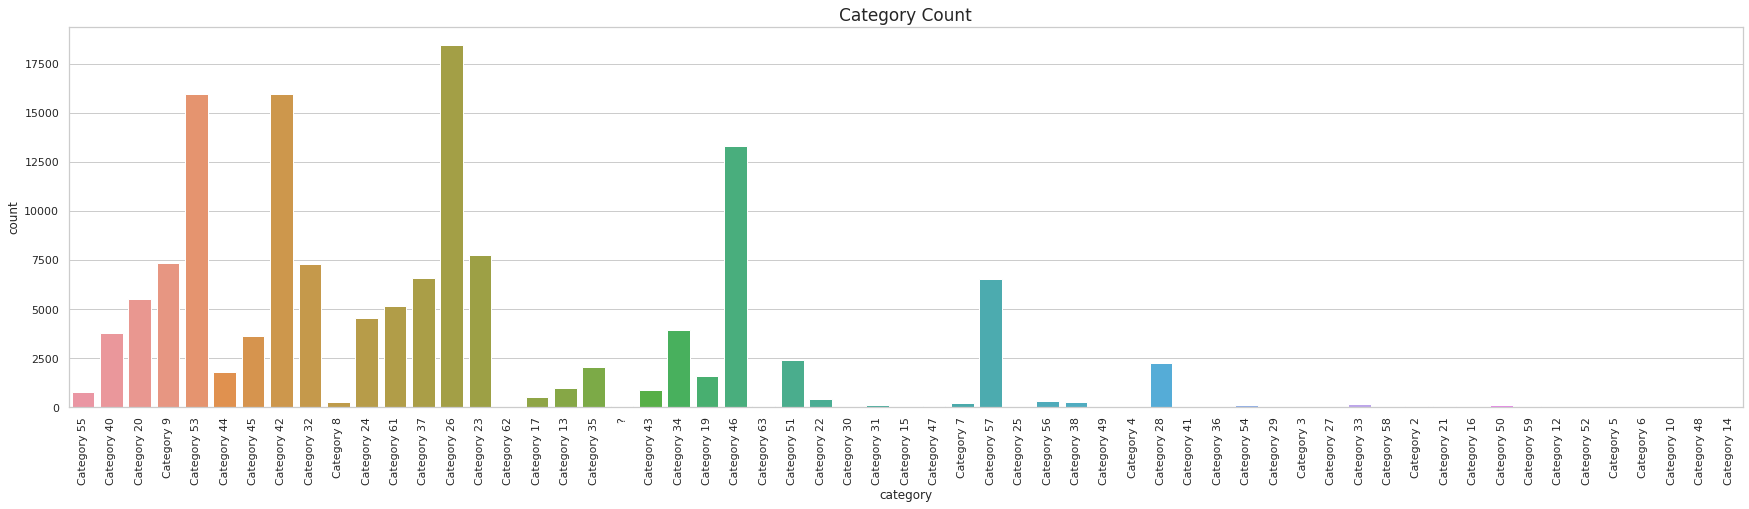


 total number of unique category are 59


Category 26    18453
Category 42    15977
Category 53    15968
Category 46    13321
Category 23     7779
Category 9      7365
Category 32     7273
Category 37     6584
Category 57     6532
Category 20     5506
Name: category, dtype: int64

In [415]:
#category
plt.figure(figsize=(30,7))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="category", data=new_df)
plt.title('Category Count',size=17)
plt.xticks(rotation=90)
plt.show()

print('\n total number of unique category are',len(new_df.category.unique()))
new_df.category.value_counts()[:10]

we can see that there is ? is also in category we can  consider it a caregory itself

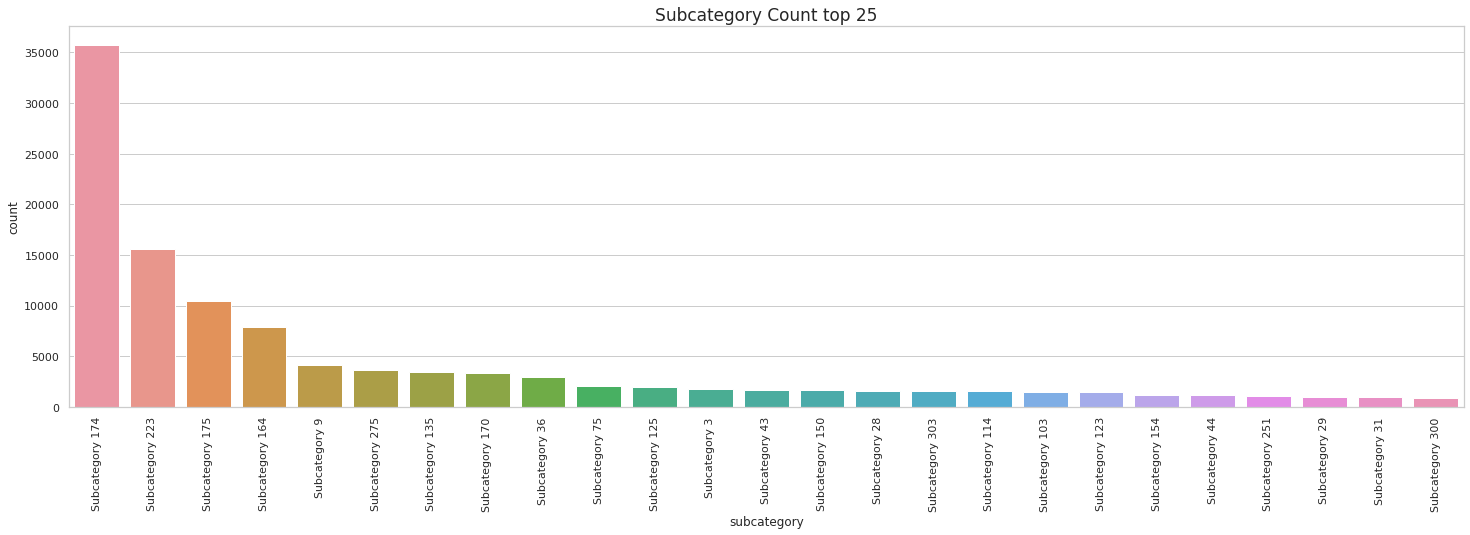


 total number of unique subcategory are 255 



Subcategory 174    35783
Subcategory 223    15598
Subcategory 175    10496
Subcategory 164     7880
Subcategory 9       4124
Subcategory 275     3643
Subcategory 135     3467
Subcategory 170     3349
Subcategory 36      2917
Subcategory 75      2113
Name: subcategory, dtype: int64

In [416]:
#subcategory 
plt.figure(figsize=(25,7))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="subcategory", data=new_df,order=new_df.subcategory.value_counts().iloc[:25].index)
plt.title('Subcategory Count top 25',size=17)
plt.xticks(rotation=90)
plt.show()

print('\n total number of unique subcategory are',len(new_df.subcategory.unique()),'\n')
new_df.subcategory.value_counts()[:10]

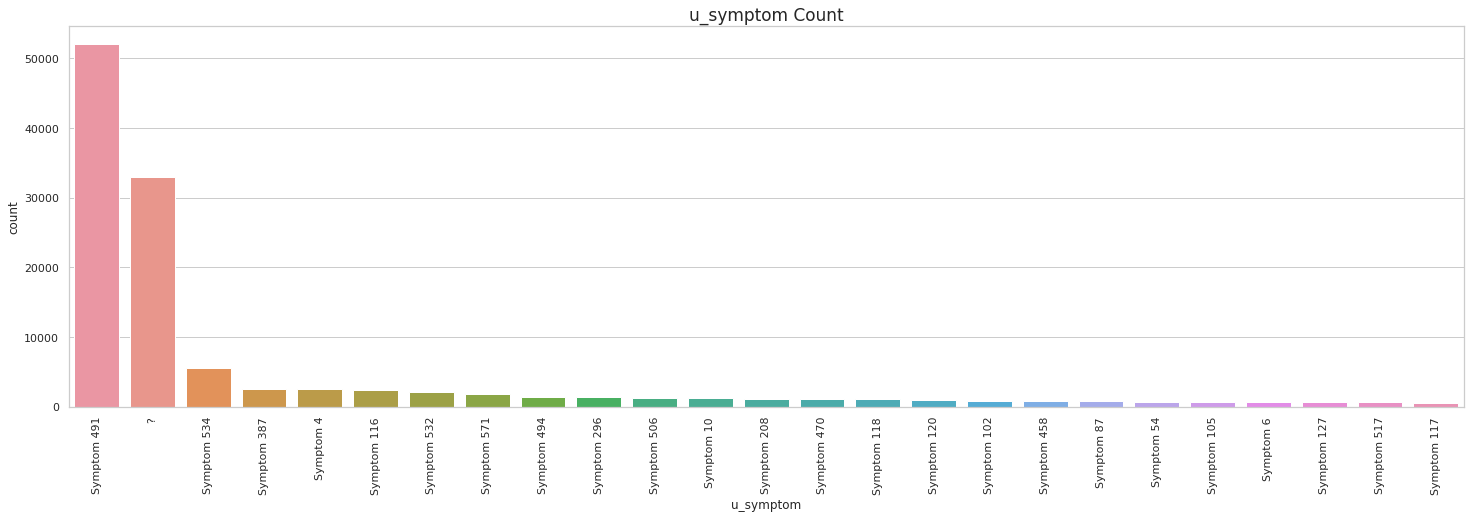


 total number of unique u_symptom are 526 



Symptom 491    51985
?              32959
Symptom 534     5559
Symptom 387     2583
Symptom 4       2532
Symptom 116     2394
Symptom 532     2097
Symptom 571     1771
Symptom 494     1367
Symptom 296     1359
Name: u_symptom, dtype: int64

In [417]:
#u_symptom 
plt.figure(figsize=(25,7))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="u_symptom", data=new_df,order=new_df.u_symptom.value_counts().iloc[:25].index)
plt.title('u_symptom Count',size=17)
plt.xticks(rotation=90)
plt.show()

print('\n total number of unique u_symptom are',len(new_df.u_symptom.unique()),'\n')
new_df.u_symptom.value_counts()[:10]

In [418]:
new_df.u_symptom.value_counts()[1]/len(new_df.u_symptom)*100

23.258554623271962

We can oberve that 23% of data does not have user perception about service availability.

We can consider it into another class in this attribute

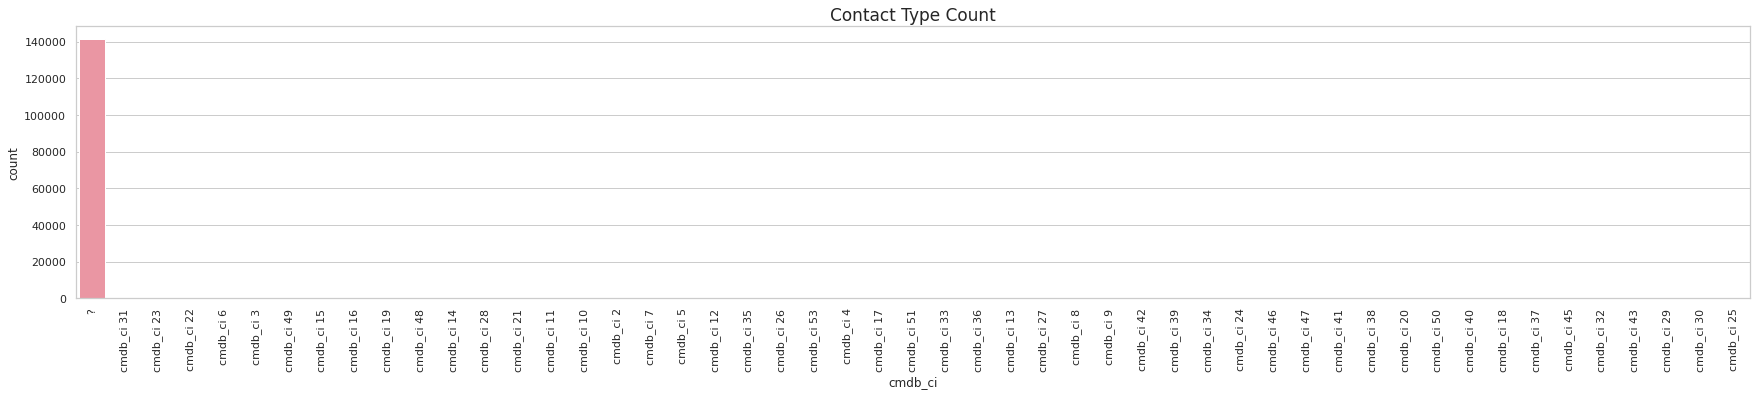


 total number of unique cmdb_ci are 51 



?             141262
cmdb_ci 31        32
cmdb_ci 49        24
cmdb_ci 7         24
cmdb_ci 11        21
cmdb_ci 14        17
cmdb_ci 46        16
cmdb_ci 23        14
cmdb_ci 5         14
cmdb_ci 17        13
Name: cmdb_ci, dtype: int64

In [419]:
#cmdb_ci
plt.figure(figsize=(30,5))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="cmdb_ci", data=new_df)
plt.title('Contact Type Count',size=17)
plt.xticks(rotation=90)
plt.show()

print('\n total number of unique cmdb_ci are',len(new_df.cmdb_ci.unique()),'\n')
new_df.cmdb_ci.value_counts()[:10]

In the description it is not a mandatory attribute and almost all the entries are ?  so we can drop this column

In [420]:
new_df.drop(columns=['cmdb_ci'],axis=1,inplace=True)

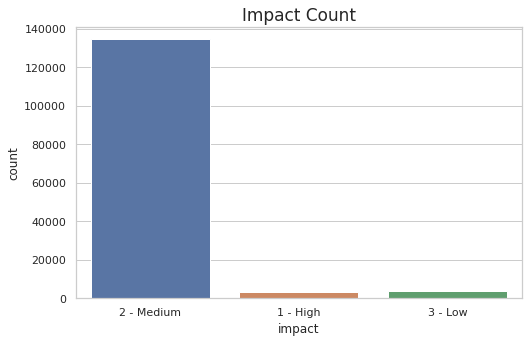

2 - Medium    134330
3 - Low         3886
1 - High        3491
Name: impact, dtype: int64

In [421]:
#impact
plt.figure(figsize=(8,5))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="impact", data=new_df)
plt.title('Impact Count',size=17)
plt.xticks()
plt.show()

new_df.impact.value_counts()

we can observe that most cases are of medium impact

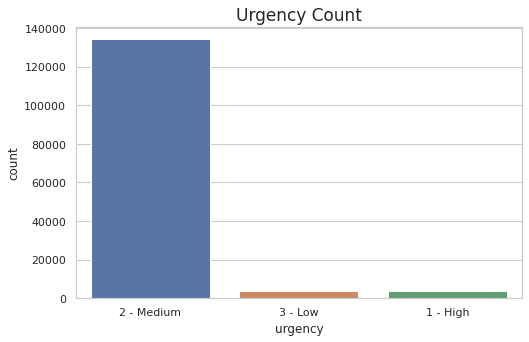

2 - Medium    134089
1 - High        4020
3 - Low         3598
Name: urgency, dtype: int64

In [422]:
#urgency
plt.figure(figsize=(8,5))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="urgency", data=new_df)
plt.title('Urgency Count',size=17)
plt.xticks()
plt.show()


new_df.urgency.value_counts()

Maximum incidents are of medium urgency

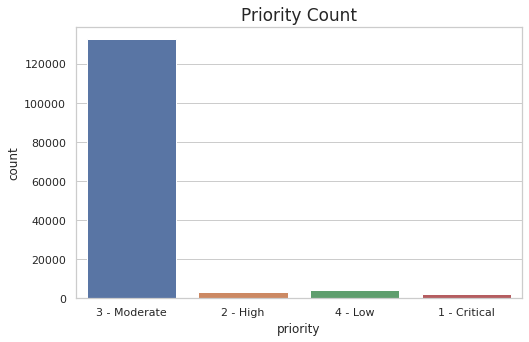

3 - Moderate    132447
4 - Low           4030
2 - High          2972
1 - Critical      2258
Name: priority, dtype: int64

In [423]:
#priority
plt.figure(figsize=(8,5))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="priority", data=new_df)
plt.title('Priority Count',size=17)
plt.xticks()
plt.show()

new_df.priority.value_counts()

Maximum cases are of Moderate Priority

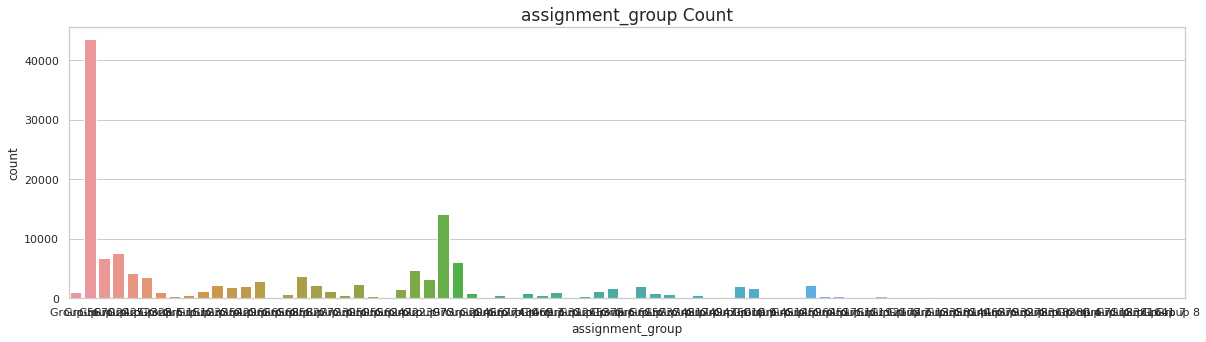

Group 70    43474
?           14213
Group 25     7679
Group 24     6752
Group 20     6170
            ...  
Group 41        3
Group 38        2
Group 16        1
Group 11        1
Group 4         1
Name: assignment_group, Length: 79, dtype: int64

In [424]:
#assignment_group
plt.figure(figsize=(20,5))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="assignment_group", data=new_df)
plt.title('assignment_group Count',size=17)
plt.xticks()
plt.show()

new_df.assignment_group.value_counts()

In [425]:
new_df['assigned_to'].value_counts()

?               27496
Resolver 17     10590
Resolver 13      8802
Resolver 194     3515
Resolver 57      3144
                ...  
Resolver 129        1
Resolver 199        1
Resolver 67         1
Resolver 131        1
Resolver 146        1
Name: assigned_to, Length: 235, dtype: int64

We can observe that the maximum assingment group is fix to 1 group and other are now known.

And maximum assignet resolver are not knows

And assingment group and resolver will take care of service we need to predict the time of closer so this trait is not that imp to us,we can drop these 2

In [426]:
new_df.drop(columns=['assignment_group','assigned_to'],axis=1,inplace=True)

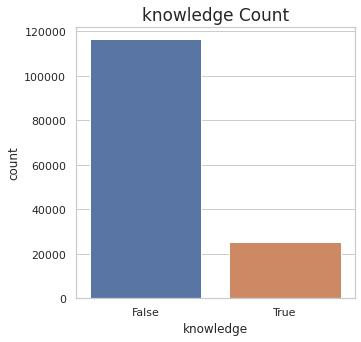

False    116344
True      25363
Name: knowledge, dtype: int64

In [427]:
#knowledge
plt.figure(figsize=(5,5))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="knowledge", data=new_df)
plt.title('knowledge Count',size=17)
plt.xticks()
plt.show()

new_df.knowledge.value_counts()

Maximum cases has not given the knowledge base document

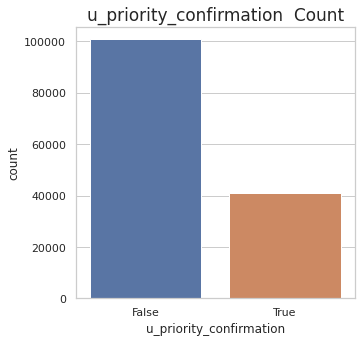

False    100735
True      40972
Name: u_priority_confirmation, dtype: int64

In [428]:
#u_priority_confirmation 
plt.figure(figsize=(5,5))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="u_priority_confirmation", data=new_df)
plt.title('u_priority_confirmation  Count',size=17)
plt.xticks()
plt.show()

new_df.u_priority_confirmation.value_counts()

Maximum cases are not being double checked so this means cases are solved soon before double check

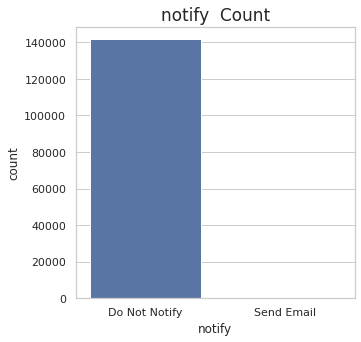

Do Not Notify    141588
Send Email          119
Name: notify, dtype: int64

In [429]:
# notify  
plt.figure(figsize=(5,5))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="notify", data=new_df)
plt.title('notify  Count',size=17)
plt.xticks()
plt.show()

new_df.notify.value_counts()

In [430]:
print(new_df.notify.value_counts()[0]/(len(new_df.notify))*100,'percent of values have not being notified')

99.91602390848723 percent of values have not being notified


In [431]:
new_df['problem_id'].value_counts()

?                  139412
Problem ID  14        184
Problem ID  2         147
Problem ID  52         82
Problem ID  239        48
                    ...  
Problem ID  181         1
Problem ID  195         1
Problem ID  88          1
Problem ID  11          1
Problem ID  33          1
Name: problem_id, Length: 253, dtype: int64

Maximum instances have no problem id
we can drop this attribute

In [432]:
new_df.drop(columns=['problem_id'],axis=1,inplace=True)

In [433]:
new_df['rfc'].value_counts()

?             140716
CHG0001230        20
CHG0000132        20
CHG0000047        18
CHG0001656        17
               ...  
CHG0003305         2
CHG0001829         1
CHG0001720         1
CHG0001437         1
CHG0000530         1
Name: rfc, Length: 182, dtype: int64

Here also the maximum request for change case are not known we can drop this also

In [434]:
new_df.drop(columns=['rfc'],axis=1,inplace=True)

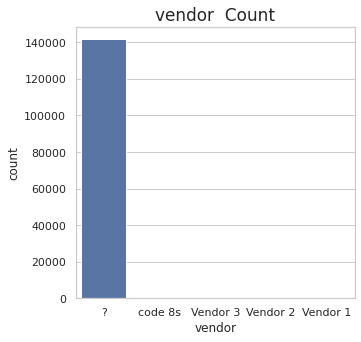

?           141463
code 8s        167
Vendor 1        69
Vendor 3         6
Vendor 2         2
Name: vendor, dtype: int64

In [435]:
#vendor
plt.figure(figsize=(5,5))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="vendor", data=new_df)
plt.title('vendor  Count',size=17)
plt.xticks()
plt.show()


new_df['vendor'].value_counts()

Most of the vendors are not known 

In [436]:
#caused_by
new_df['caused_by'].value_counts()

?             141684
CHG0000097        11
CHG0000132         7
CHG0001327         5
Name: caused_by, dtype: int64

In [437]:
print(new_df.caused_by.value_counts()[0]/(len(new_df.caused_by))*100,'percent of caused by not known')

99.98376932685046 percent of caused by not known


In [438]:
new_df.drop(columns=['caused_by'],axis=1,inplace=True)

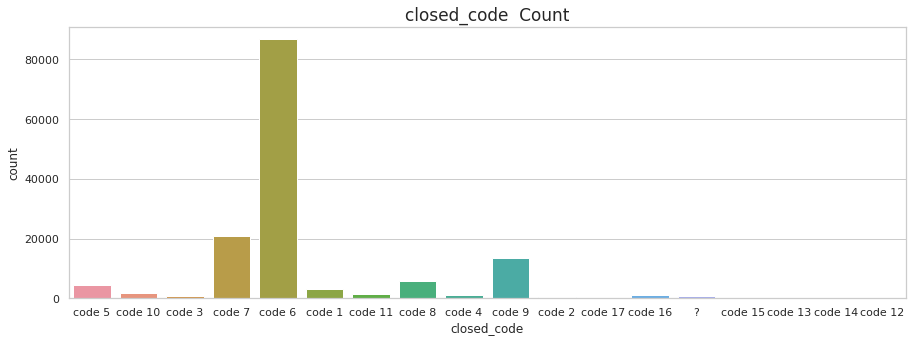

code 6     86583
code 7     20728
code 9     13562
code 8      5646
code 5      4469
code 1      3265
code 10     1678
code 11     1493
code 4      1139
code 16     1091
?            714
code 3       608
code 2       349
code 15      183
code 17      115
code 13       59
code 12       13
code 14       12
Name: closed_code, dtype: int64

In [439]:
#closed_code
plt.figure(figsize=(15,5))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="closed_code", data=new_df)
plt.title('closed_code  Count',size=17)
plt.xticks()
plt.show()

new_df['closed_code'].value_counts()

Code is provided after the incident is closed and cannot be reopend 

so it is of no use as it is provided after providing resolution and of no use if incident is in processiing
so We can drop this feature


In [440]:
new_df.drop(columns=['closed_code'],axis=1,inplace=True)

In [441]:
#resolved_by
new_df['resolved_by'].value_counts()

Resolved by 15     15421
Resolved by 11     12050
Resolved by 103     5360
Resolved by 177     3811
Resolved by 53      3637
                   ...  
Resolved by 222        4
Resolved by 17         4
Resolved by 48         3
Resolved by 39         3
Resolved by 185        3
Name: resolved_by, Length: 217, dtype: int64

it is the resolver id which is not of much use in prediction of closing date,So we can drop this attribute

In [442]:
new_df.drop(columns=['resolved_by'],axis=1,inplace=True)

In [443]:
#resolved_at
new_df['resolved_at'].value_counts()

?                  3141
3/6/2016 16:29       93
3/6/2016 16:28       85
3/6/2016 16:27       83
3/6/2016 16:31       59
                   ... 
24/3/2016 18:00       2
5/4/2016 07:37        2
23/3/2016 12:20       2
21/3/2016 18:52       2
9/3/2016 08:54        2
Name: resolved_at, Length: 18506, dtype: int64

Our main concern is closed date and we can observe that maximum values are not known so we can drop this attribute

In [444]:
new_df.drop(columns=['resolved_at'],axis=1,inplace=True)

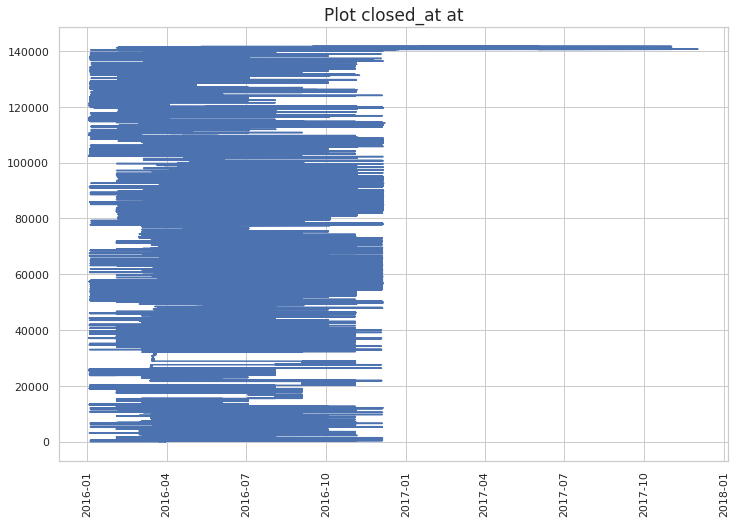

In [445]:
# #plotting closed_at
new_df['closed_at']=pd.to_datetime(new_df['closed_at'])

plt.figure(figsize = (12,8))
date_df = new_df.sort_values('closed_at', ascending=True)
x=np.array(date_df.opened_at)
y=np.array(np.arange(0,len(date_df.opened_at)))
plt.plot(x,y)
plt.title('Plot closed_at at',size=17)
plt.xticks(rotation='vertical')
plt.show()

After Basic analysis of the attributes the columns we are flft with are

In [446]:
new_df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141707 entries, 0 to 141711
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   number                   141707 non-null  object        
 1   incident_state           141707 non-null  object        
 2   active                   141707 non-null  bool          
 3   reassignment_count       141707 non-null  int64         
 4   reopen_count             141707 non-null  int64         
 5   sys_mod_count            141707 non-null  int64         
 6   made_sla                 141707 non-null  bool          
 7   opened_by                141707 non-null  object        
 8   opened_at                141707 non-null  datetime64[ns]
 9   contact_type             141707 non-null  object        
 10  location                 141707 non-null  object        
 11  category                 141707 non-null  object        
 12  subcategory     

#Dependent variable creation

We need businedd days between the open date and closing days

In [447]:
new_df=new_df.reset_index(drop=True)

In [448]:
#busniedd days bwtween open and closing days
b_days=[]
for i in range(len(new_df)):
  end = new_df['closed_at'][i].date()
  start = new_df['opened_at'][i].date()

  temp=end-start
  b_days.append(temp) 


In [449]:
#therer are lots of negative values also
# We will take absolute values 
 
new_df['days_to_complete']=np.abs(np.array((new_df['closed_at']-new_df['opened_at']).dt.days))

In [450]:
new_df.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,opened_by,opened_at,contact_type,location,category,subcategory,u_symptom,impact,urgency,priority,knowledge,u_priority_confirmation,notify,vendor,closed_at,days_to_complete
0,INC0000045,New,True,0,0,0,True,Opened by 8,2016-02-29 01:16:00,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,2 - Medium,2 - Medium,3 - Moderate,True,False,Do Not Notify,?,2016-05-03 12:00:00,64
1,INC0000045,Resolved,True,0,0,2,True,Opened by 8,2016-02-29 01:16:00,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,2 - Medium,2 - Medium,3 - Moderate,True,False,Do Not Notify,?,2016-05-03 12:00:00,64
2,INC0000045,Resolved,True,0,0,3,True,Opened by 8,2016-02-29 01:16:00,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,2 - Medium,2 - Medium,3 - Moderate,True,False,Do Not Notify,?,2016-05-03 12:00:00,64
3,INC0000045,Closed,False,0,0,4,True,Opened by 8,2016-02-29 01:16:00,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,2 - Medium,2 - Medium,3 - Moderate,True,False,Do Not Notify,?,2016-05-03 12:00:00,64
4,INC0000047,New,True,0,0,0,True,Opened by 397,2016-02-29 04:40:00,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,2 - Medium,2 - Medium,3 - Moderate,True,False,Do Not Notify,?,2016-06-03 10:00:00,95


In [451]:
new_df['days_to_complete'].describe()

count    141707.000000
mean         83.452448
std          78.103890
min           0.000000
25%          10.000000
50%          54.000000
75%         153.000000
max         603.000000
Name: days_to_complete, dtype: float64

In [452]:
#total list of values of Target attribute
new_df.days_to_complete.unique()

array([ 64,  95,  94, 125, 156,  24,  47,  48, 278, 155,  27,  19,  26,
       124,  65,  17, 186,   0, 187, 274, 299,  61, 112,  35,  36, 217,
       129, 301,  53, 138,   4,  84,  83,  30,  23, 106, 152, 182,  81,
       213, 244, 181, 212,  92, 141,  32,  86, 243,  88,  85, 335, 107,
       275, 135,  82,  80, 140, 151,  50,  54, 103, 110, 200,  74,  70,
         1,  62,  41,  39, 104, 122,  52,   2,  73,  29, 305,  75, 300,
       108,  76,  55, 109, 123, 167, 194,  79, 111, 199, 424, 114, 216,
       214, 285, 188, 115,  38,  72, 102,  49, 153,  21, 184, 183,  28,
        78,  11,  25, 246,  96, 205, 149, 486,   3, 173,  59,  31,  22,
       484, 269,  63,  57, 145, 117, 113,  44, 154,  20,  10,   7, 146,
       198,   8,   6,  16,   5, 215,   9,  13, 247,  60, 218, 121,  40,
        71,  68,  12, 101,  97,  98,  99,  33, 150, 118,  90,  91,  42,
       100,  93, 132, 128, 130, 136, 137, 142,  46, 127, 180, 143, 131,
       133, 163, 161, 139, 160, 159, 105, 171, 162, 158, 144, 16

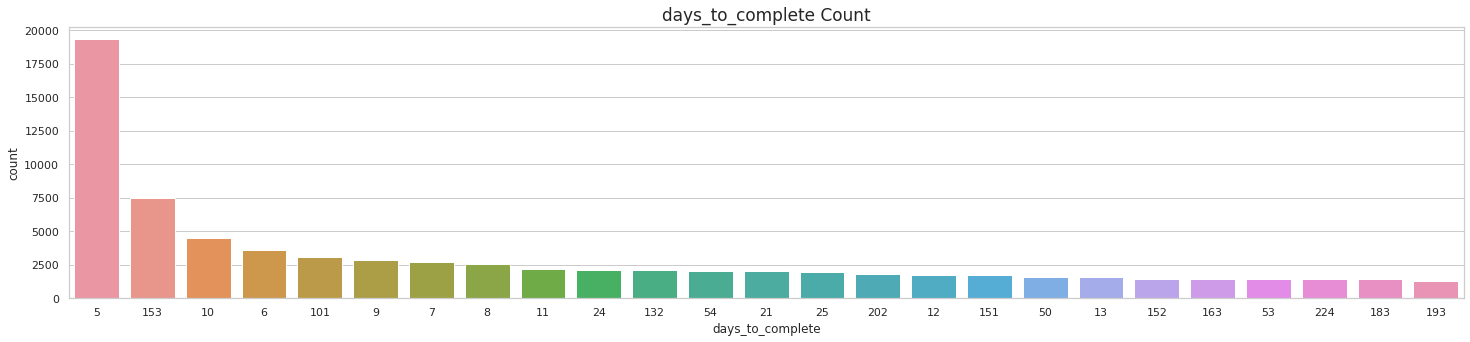

5      19312
153     7487
10      4479
6       3602
101     3079
       ...  
246        4
520        4
315        3
283        3
494        2
Name: days_to_complete, Length: 306, dtype: int64

In [453]:
#days_to_complete
plt.figure(figsize=(25,5))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="days_to_complete", data=new_df,order=new_df.days_to_complete.value_counts().iloc[:25].index)
plt.title('days_to_complete Count',size=17)
plt.xticks()
plt.show()

new_df['days_to_complete'].value_counts()

We cn oberve that the days between opening and closing is too much in some cases,Usually the incident should be closed within 3-5 SLA days but the time taken by few cases here are not of industy standards,

We will turn this days into bucket of days 

But here is a thing about SLA Clock and Chelender clock

SLA business hour runs only for 8 hours a day 

So 1 Calender Day =8 hours of SLA days which is 3 times SLA days

Here We have Business days So we will Convert it into SLA days
SLA Days = Calenders day/3

In [454]:
new_df['SLA_days_to_complete']=np.abs((new_df['days_to_complete'])/3).astype(int)

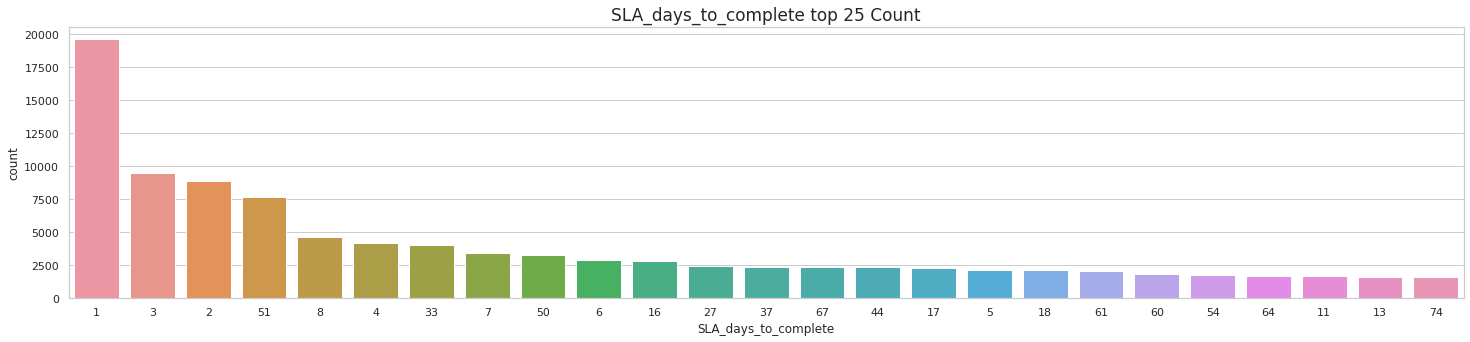

1      19611
3       9515
2       8862
51      7659
8       4609
       ...  
99         5
173        4
114        4
105        3
164        2
Name: SLA_days_to_complete, Length: 120, dtype: int64

In [455]:
#new SLA_days_to_complete plot
plt.figure(figsize=(25,5))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="SLA_days_to_complete", data=new_df,order=new_df.SLA_days_to_complete.value_counts().iloc[:25].index)
plt.title('SLA_days_to_complete top 25 Count',size=17)
plt.xticks()
plt.show()

new_df['SLA_days_to_complete'].value_counts()

In [456]:
new_df['SLA_days_to_complete'].describe()

count    141707.000000
mean         27.459730
std          26.080658
min           0.000000
25%           3.000000
50%          18.000000
75%          51.000000
max         201.000000
Name: SLA_days_to_complete, dtype: float64

In [457]:
np.sort(new_df['SLA_days_to_complete'].unique()) 

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  99, 100, 101, 102, 105, 106,
       111, 114, 117, 123, 139, 141, 146, 147, 161, 162, 164, 168, 173,
       180, 185, 201])

Oberving the CDF we can now create bins for the target distrubution

 0-5 Days --1

 5-15 Days --2

15-35 Days --3

35-60 Days --4

60 and above Days --5


In [458]:
#https://stackoverflow.com/a/59796630/15411244
# from numba import njit

def conversion(arr):
    bins = np.empty(arr.shape[0])
    for idx, x in enumerate(arr):
        if (x >= 0) & (x < 5):
            bins[idx] = 1
        elif (x >= 5) & (x < 15):
            bins[idx] = 2
        elif (x >= 15) & (x < 35):
            bins[idx] = 3
        elif (x >= 35) & (x < 60):
            bins[idx] = 4
        else:
            bins[idx] = 5
            
    return bins



In [459]:
temp=conversion(new_df['SLA_days_to_complete'].to_numpy())

In [460]:
new_df['SLA_range']=temp

In [461]:
new_df.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,opened_by,opened_at,contact_type,location,category,subcategory,u_symptom,impact,urgency,priority,knowledge,u_priority_confirmation,notify,vendor,closed_at,days_to_complete,SLA_days_to_complete,SLA_range
0,INC0000045,New,True,0,0,0,True,Opened by 8,2016-02-29 01:16:00,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,2 - Medium,2 - Medium,3 - Moderate,True,False,Do Not Notify,?,2016-05-03 12:00:00,64,21,3.0
1,INC0000045,Resolved,True,0,0,2,True,Opened by 8,2016-02-29 01:16:00,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,2 - Medium,2 - Medium,3 - Moderate,True,False,Do Not Notify,?,2016-05-03 12:00:00,64,21,3.0
2,INC0000045,Resolved,True,0,0,3,True,Opened by 8,2016-02-29 01:16:00,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,2 - Medium,2 - Medium,3 - Moderate,True,False,Do Not Notify,?,2016-05-03 12:00:00,64,21,3.0
3,INC0000045,Closed,False,0,0,4,True,Opened by 8,2016-02-29 01:16:00,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,2 - Medium,2 - Medium,3 - Moderate,True,False,Do Not Notify,?,2016-05-03 12:00:00,64,21,3.0
4,INC0000047,New,True,0,0,0,True,Opened by 397,2016-02-29 04:40:00,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,2 - Medium,2 - Medium,3 - Moderate,True,False,Do Not Notify,?,2016-06-03 10:00:00,95,31,3.0


In [462]:
new_df['closed_day_name']=new_df['closed_at'].dt.day_name()

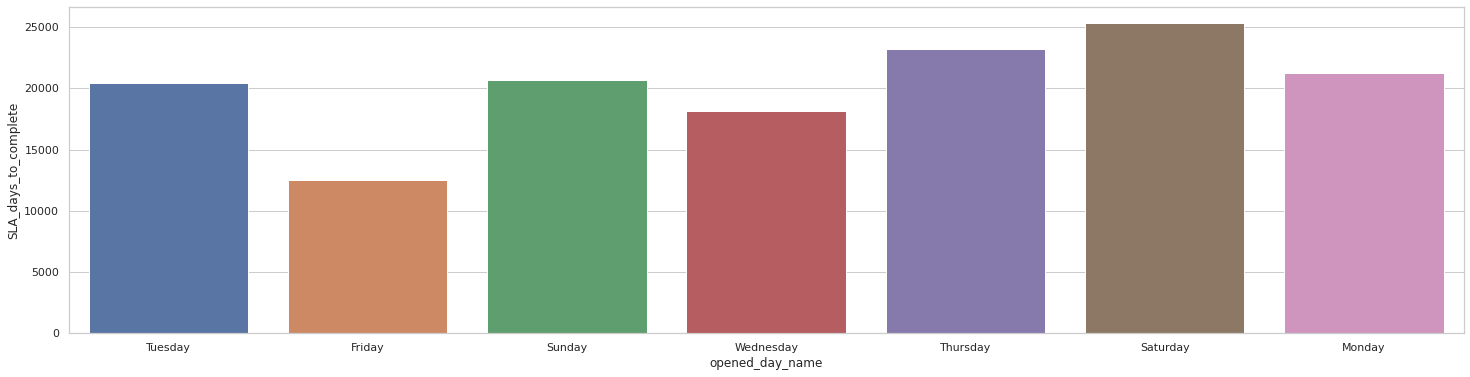

Saturday     25363
Thursday     23200
Monday       21267
Sunday       20714
Tuesday      20448
Wednesday    18180
Friday       12535
Name: closed_day_name, dtype: int64

In [463]:
#opened_day_name
plt.figure(figsize=(25,6))
sns.countplot(data=new_df,x='closed_day_name')
plt.xlabel("opened_day_name", size=12)
plt.ylabel("SLA_days_to_complete", size=12)
plt.show()

new_df.closed_day_name.value_counts()

we can see that solutions are being provided all 7 days

In [464]:
new_df.drop(columns=['closed_at','number','days_to_complete','closed_day_name'],axis=1,inplace=True)

# Null values 

We oberved that all the '?' values are in categorical attributes so we will consider them as seperate category while one-hot encoding

#EDA

In [465]:
new_df.dtypes

incident_state                     object
active                               bool
reassignment_count                  int64
reopen_count                        int64
sys_mod_count                       int64
made_sla                             bool
opened_by                          object
opened_at                  datetime64[ns]
contact_type                       object
location                           object
category                           object
subcategory                        object
u_symptom                          object
impact                             object
urgency                            object
priority                           object
knowledge                            bool
u_priority_confirmation              bool
notify                             object
vendor                             object
SLA_days_to_complete                int64
SLA_range                         float64
dtype: object

We will convert tmestamp dtype to numerical columns


In [466]:
new_df['opened_day']=new_df['opened_at'].dt.day
new_df['opened_month']=new_df['opened_at'].dt.month
new_df['opened_day_name']=new_df['opened_at'].dt.day_name()

new_df.drop(columns=['opened_at'],axis=1,inplace=True)

<Figure size 1440x360 with 0 Axes>

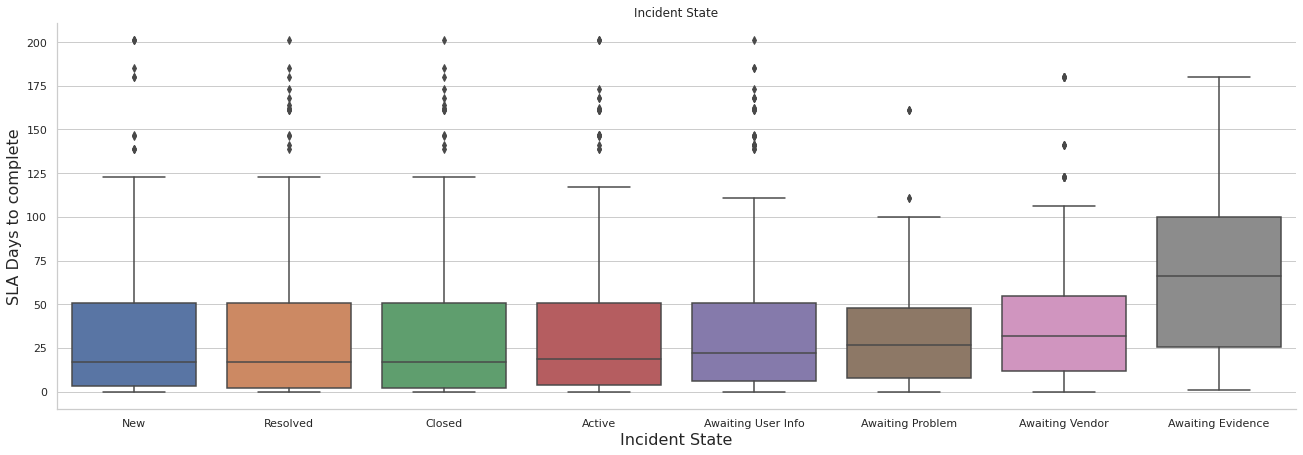

In [467]:
# incident_state
plt.figure(figsize=(20,5))
sns.catplot(y='SLA_days_to_complete',x='incident_state',data=new_df,kind='box',height=6,aspect=3)
plt.title('Incident State')
plt.xlabel("Incident State", size=16)
plt.ylabel("SLA Days to complete", size=16)
plt.show()

We can observe that almost all the incident state are taking equal time but awaiting evidenct is taking the longest time for completion.

We can observe there are few outlines incidents which are taking too much time for comletion

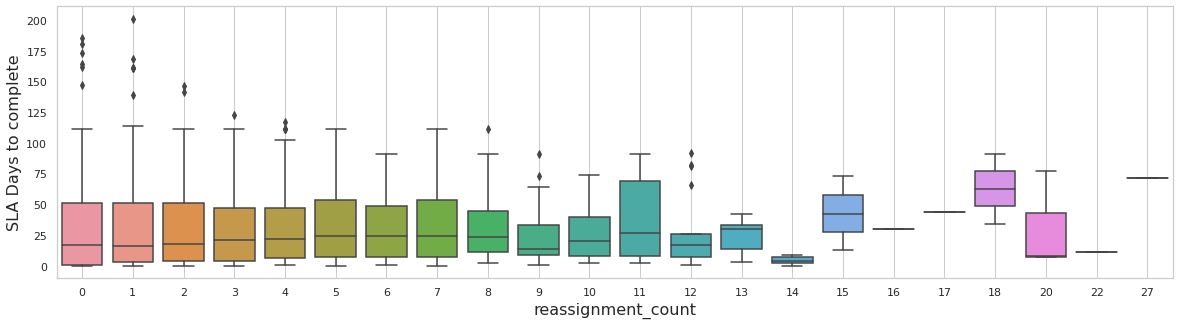

In [468]:
#reassignment_count
plt.figure(figsize=(20,5))
temp_df=new_df[new_df['incident_state']=='Closed']
sns.boxplot(data=temp_df,x='reassignment_count',y='SLA_days_to_complete')
plt.xlabel("reassignment_count", size=16)
plt.ylabel("SLA Days to complete", size=16)
plt.grid()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


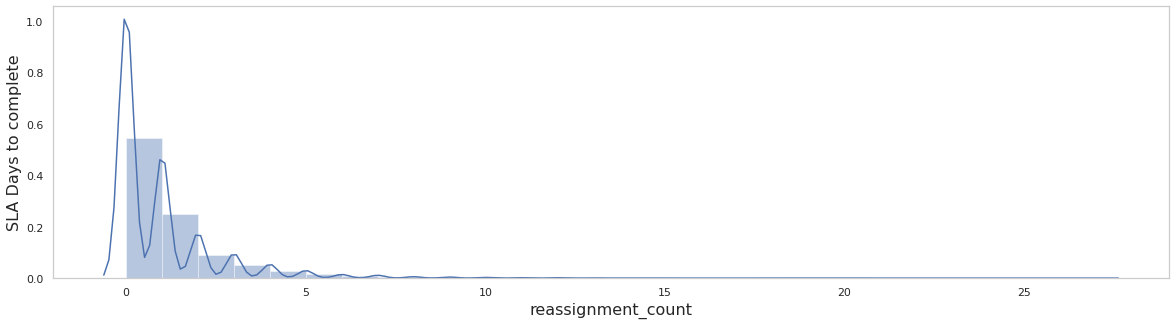

In [469]:
plt.figure(figsize=(20,5))
temp_df=new_df[new_df['incident_state']=='Closed']
sns.distplot(temp_df['reassignment_count'],bins=27)
plt.xlabel("reassignment_count", size=16)
plt.ylabel("SLA Days to complete", size=16)
plt.grid()
plt.show()

  We are observing any realtion between SLA days and support analyst changed .

  As the analyst are chaging we can see a slow decrease in the SLA days compltion.



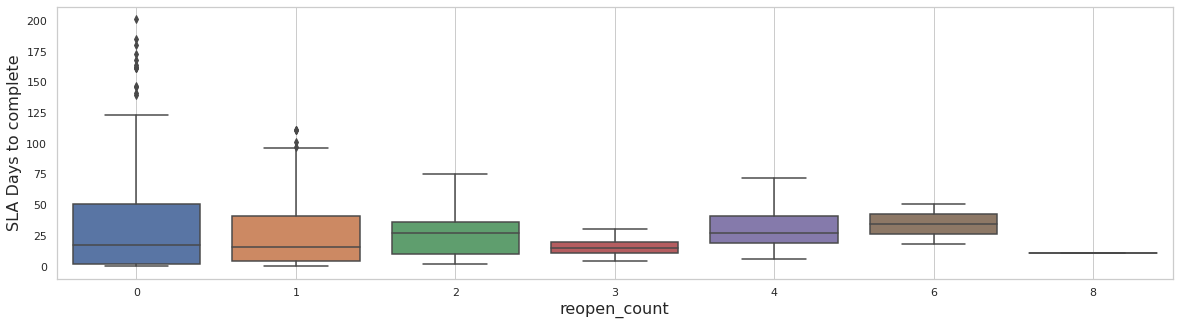

0    24707
1      248
2       19
4        4
3        4
6        2
8        1
Name: reopen_count, dtype: int64

In [470]:
#reopen_count
plt.figure(figsize=(20,5))
temp_df=new_df[new_df['incident_state']=='Closed']
sns.boxplot(data=temp_df,x='reopen_count',y='SLA_days_to_complete')
plt.xlabel("reopen_count", size=16)
plt.ylabel("SLA Days to complete", size=16)
plt.grid()
plt.show()

temp_df.reopen_count.value_counts()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


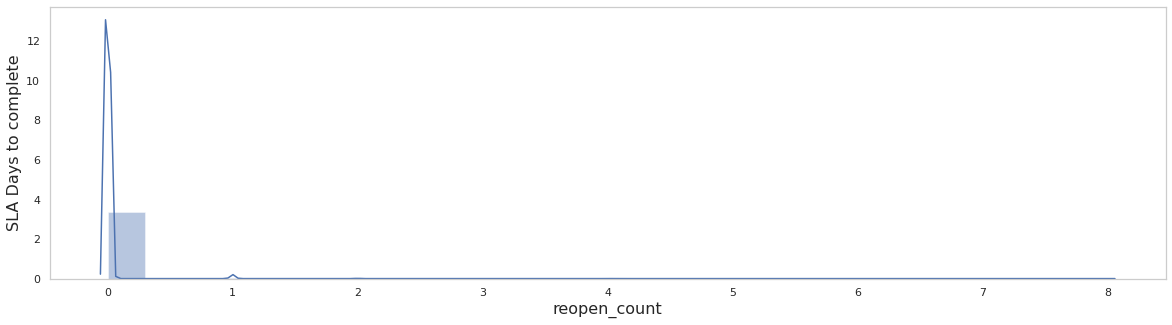

In [471]:
plt.figure(figsize=(20,5))
temp_df=new_df[new_df['incident_state']=='Closed']
sns.distplot(temp_df['reopen_count'],bins=27)
plt.xlabel("reopen_count", size=16)
plt.ylabel("SLA Days to complete", size=16)
plt.grid()
plt.show()

We can oberve that maximum cases incidents are not reopened 

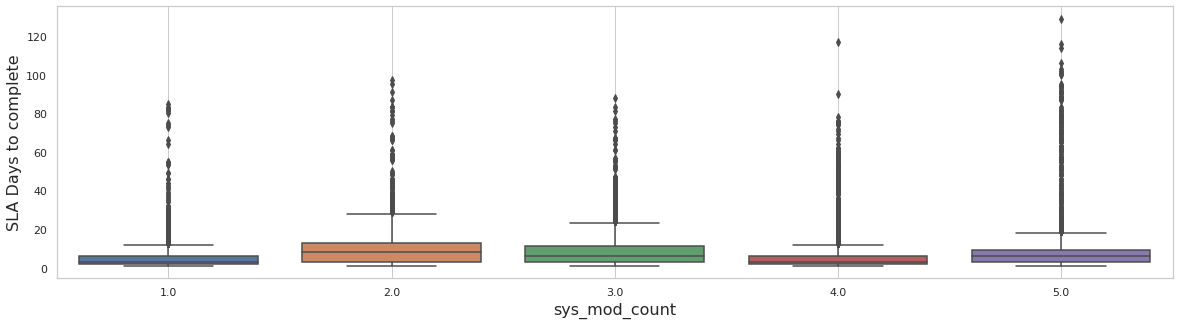

In [472]:
#sys_mod_count
plt.figure(figsize=(20,5))
temp_df=new_df[new_df['incident_state']=='Closed']
sns.boxplot(data=temp_df,y='sys_mod_count',x='SLA_range')
plt.xlabel("sys_mod_count", size=16)
plt.ylabel("SLA Days to complete", size=16)
plt.grid()
plt.show()


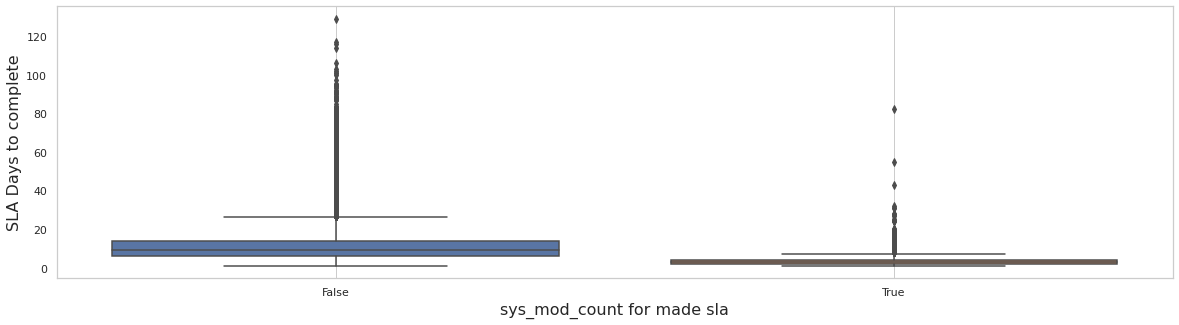

In [473]:
#sys_mod_count
plt.figure(figsize=(20,5))
temp_df=new_df[new_df['incident_state']=='Closed']
sns.boxplot(data=temp_df,y='sys_mod_count',x='made_sla')
plt.xlabel("sys_mod_count for made sla", size=16)
plt.ylabel("SLA Days to complete", size=16)
plt.grid()
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


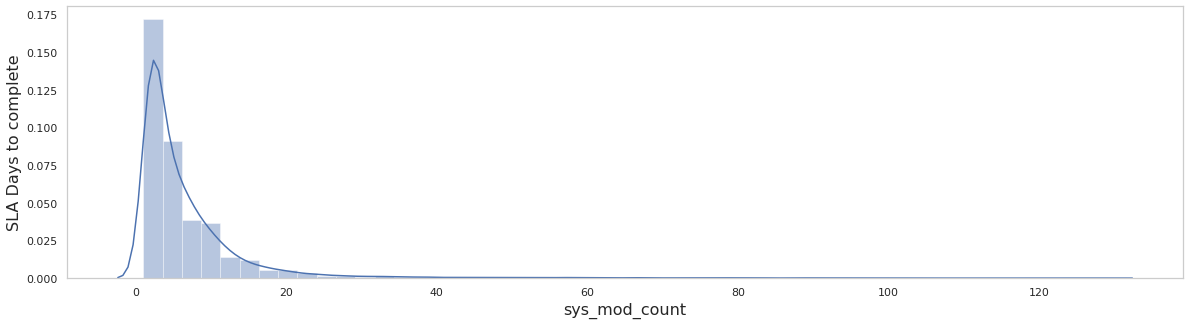

In [474]:
plt.figure(figsize=(20,5))
temp_df=new_df[new_df['incident_state']=='Closed']
sns.distplot(temp_df['sys_mod_count'])
plt.xlabel("sys_mod_count", size=16)
plt.ylabel("SLA Days to complete", size=16)
plt.grid()
plt.show()

1-We can observe that there are lots of outlines in the graph which is not of industry standards.

2-In the graph we can seee that there is a skrewness int the count of modification count and SLA days to complete days

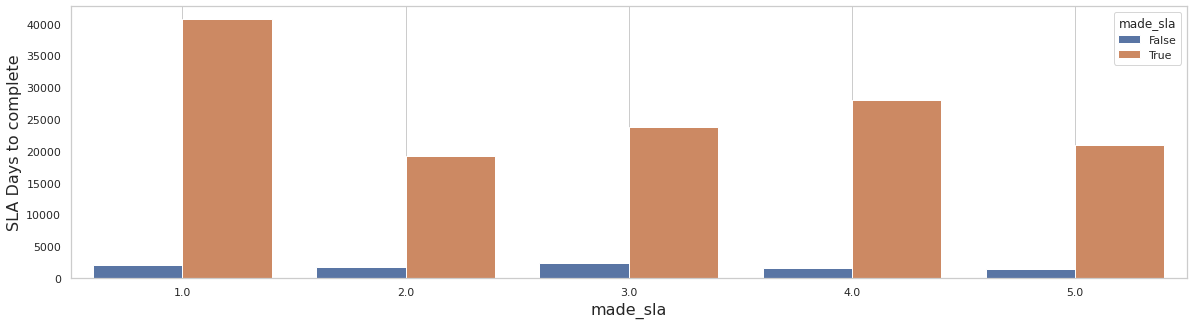

In [475]:
#made_sla
plt.figure(figsize=(20,5))
sns.countplot(data=new_df,x='SLA_range',hue='made_sla')
plt.xlabel("made_sla", size=16)
plt.ylabel("SLA Days to complete", size=16)
plt.grid()
plt.show()

We can see there are incidets closed under SLA periods in the longest bucket also and tehre are cases which failed to complete incident under SLA in the shortest time bucket .We can sat that there are different types of SLA periods


In [476]:
#opened by
new_df.opened_by.value_counts()

Opened by  17     41463
Opened by  24      8063
Opened by  131     7269
Opened by  108     6121
Opened by  55      5655
                  ...  
Opened by  150        3
Opened by  528        3
Opened by  7          3
Opened by  486        3
Opened by  440        3
Name: opened_by, Length: 208, dtype: int64

These are the ids of the people who reported the incident

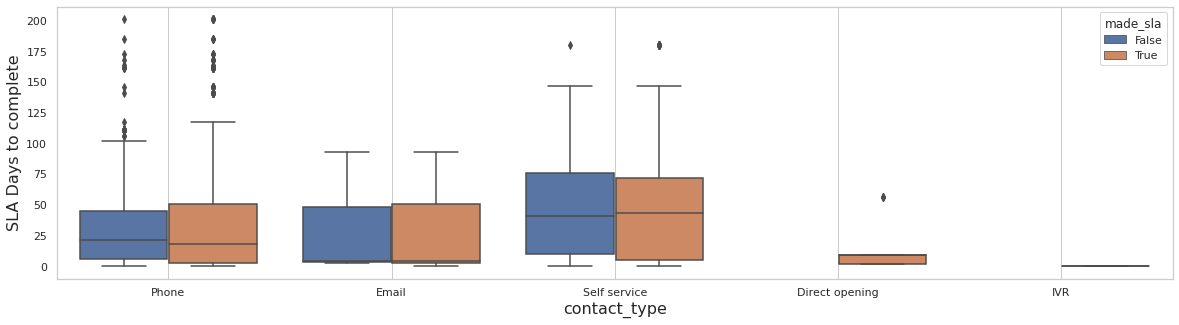

Phone             140457
Self service         995
Email                220
IVR                   18
Direct opening        17
Name: contact_type, dtype: int64

In [477]:
#contact type
plt.figure(figsize=(20,5))
sns.boxplot(data=new_df,x='contact_type',y='SLA_days_to_complete',hue='made_sla')
plt.xlabel("contact_type", size=16)
plt.ylabel("SLA Days to complete", size=16)
plt.grid()
plt.show()

new_df.contact_type.value_counts()

we can see that there is huge differenece between phone and other service contact but stll the graph shows that there is not much difference in SLA completion time.

In [478]:
#location
new_df.location.value_counts()

Location 204    31690
Location 161    22605
Location 143    19245
Location 108    12623
Location 93     11554
                ...  
Location 211        3
Location 227        3
Location 166        2
Location 132        2
Location 31         2
Name: location, Length: 225, dtype: int64

it the location where the incident has taken place

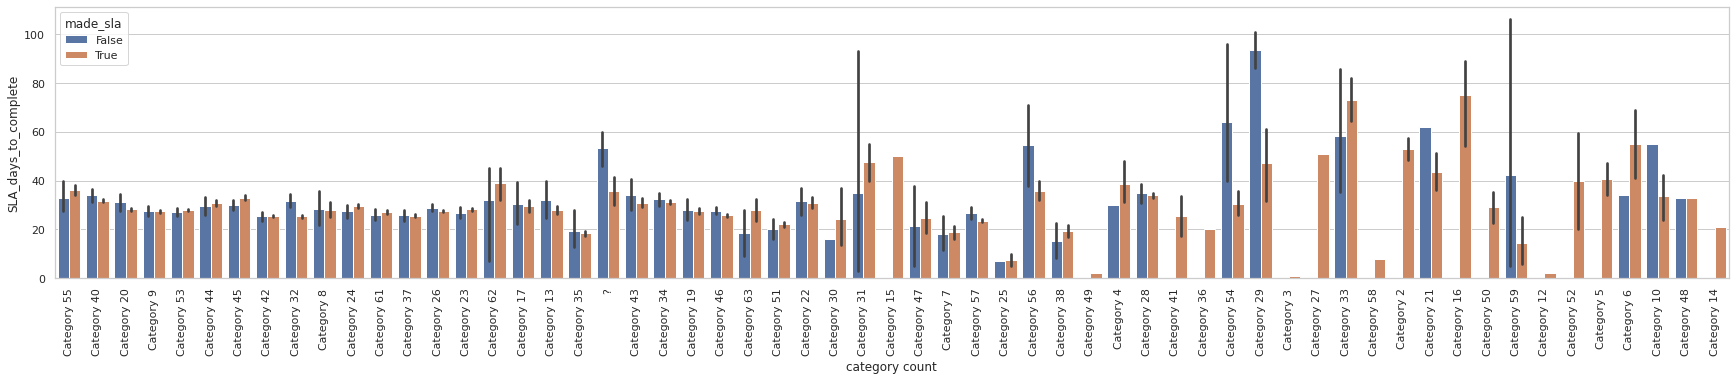

In [479]:
#category
plt.figure(figsize=(30,5))
sns.barplot(data=new_df,x='category',y='SLA_days_to_complete',hue='made_sla')
plt.xlabel("category count", size=12)
plt.ylabel("SLA_days_to_complete", size=12)
plt.xticks(rotation=90)
plt.show()

we can observe that maximum categories SLA is berached and not breachec are same.

There are lots of outliners also we need to take care of them also later

In [480]:
#subcategory
new_df.subcategory.value_counts()

Subcategory 174    35783
Subcategory 223    15598
Subcategory 175    10496
Subcategory 164     7880
Subcategory 9       4124
                   ...  
Subcategory 124        2
Subcategory 264        1
Subcategory 179        1
Subcategory 284        1
Subcategory 241        1
Name: subcategory, Length: 255, dtype: int64

it is secondlevel description of category

In [481]:
# u_symptom
new_df.u_symptom.value_counts()

Symptom 491    51985
?              32959
Symptom 534     5559
Symptom 387     2583
Symptom 4       2532
               ...  
Symptom 184        1
Symptom 103        1
Symptom 155        1
Symptom 441        1
Symptom 578        1
Name: u_symptom, Length: 526, dtype: int64

It is user description of the service avalablity

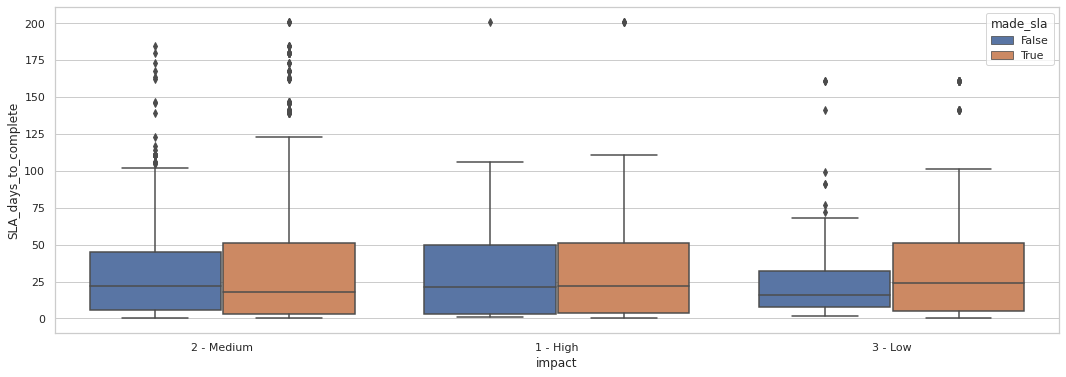

2 - Medium    134330
3 - Low         3886
1 - High        3491
Name: impact, dtype: int64

In [482]:
#impact
plt.figure(figsize=(18,6))
sns.boxplot(data=new_df,x='impact',y='SLA_days_to_complete',hue='made_sla')
plt.xlabel("impact", size=12)
plt.ylabel("SLA_days_to_complete", size=12)
plt.show()

new_df.impact.value_counts()

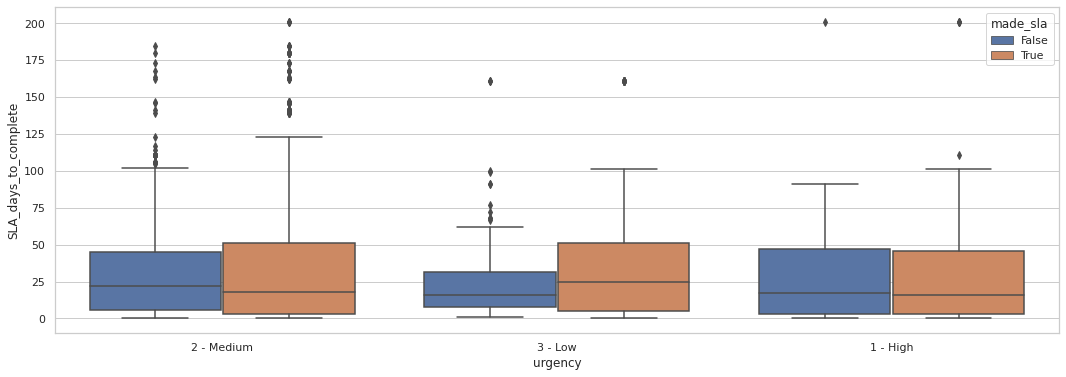

2 - Medium    134089
1 - High        4020
3 - Low         3598
Name: urgency, dtype: int64

In [483]:
#urgency
plt.figure(figsize=(18,6))
sns.boxplot(data=new_df,x='urgency',y='SLA_days_to_complete',hue='made_sla')
plt.xlabel("urgency", size=12)
plt.ylabel("SLA_days_to_complete", size=12)
plt.show()

new_df.urgency.value_counts()

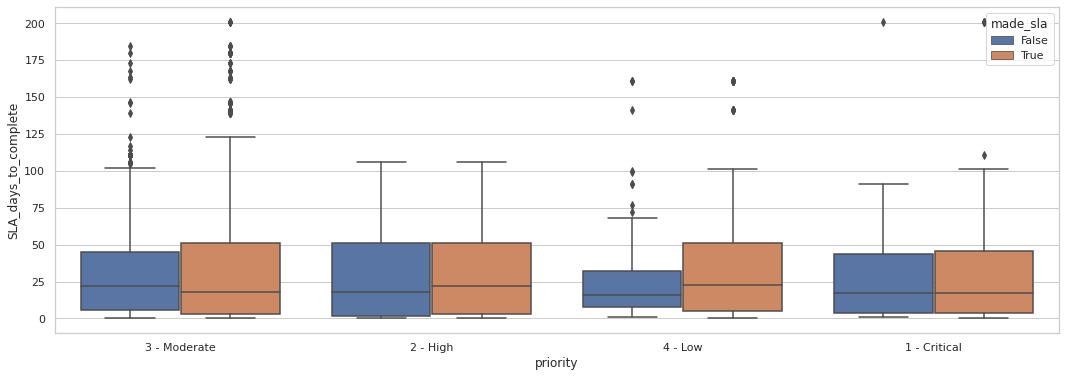

3 - Moderate    132447
4 - Low           4030
2 - High          2972
1 - Critical      2258
Name: priority, dtype: int64

In [484]:
#priority
plt.figure(figsize=(18,6))
sns.boxplot(data=new_df,x='priority',y='SLA_days_to_complete',hue='made_sla')
plt.xlabel("priority", size=12)
plt.ylabel("SLA_days_to_complete", size=12)
plt.show()

new_df.priority.value_counts()

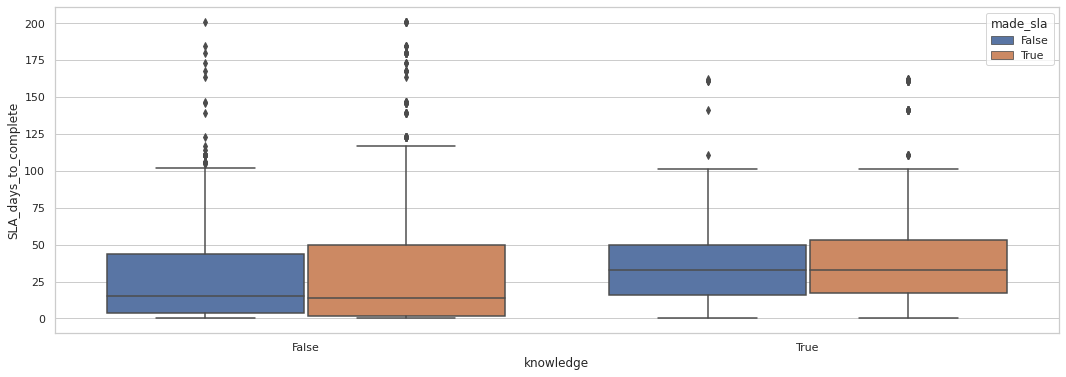

False    116344
True      25363
Name: knowledge, dtype: int64

In [485]:
#knowledge
plt.figure(figsize=(18,6))
sns.boxplot(data=new_df,x='knowledge',y='SLA_days_to_complete',hue='made_sla')
plt.xlabel("knowledge", size=12)
plt.ylabel("SLA_days_to_complete", size=12)
plt.show()

new_df.knowledge.value_counts()

inspite of huge difference between knowlegde still the SLA completion is almost the same in both cases

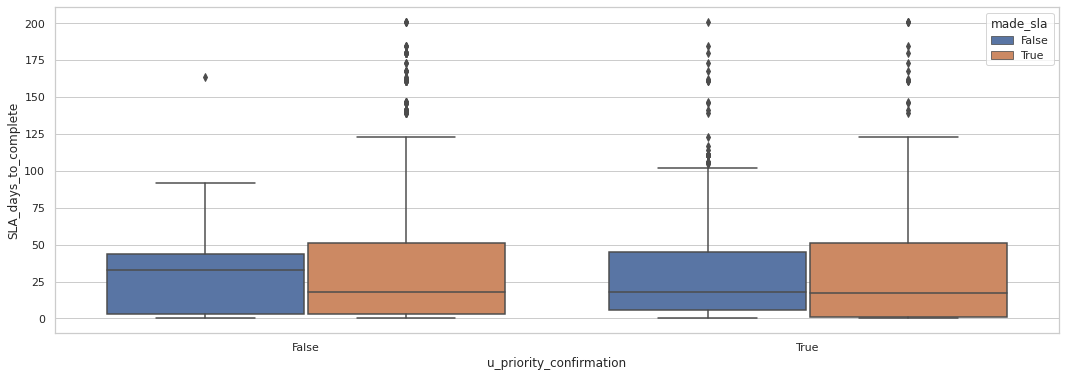

False    100735
True      40972
Name: u_priority_confirmation, dtype: int64

In [486]:
# u_priority_confirmation
plt.figure(figsize=(18,6))
sns.boxplot(data=new_df,x='u_priority_confirmation',y='SLA_days_to_complete',hue='made_sla')
plt.xlabel("u_priority_confirmation", size=12)
plt.ylabel("SLA_days_to_complete", size=12)
plt.show()

new_df.u_priority_confirmation.value_counts()

The distrubution is alomost the same but there are lost of outliners 

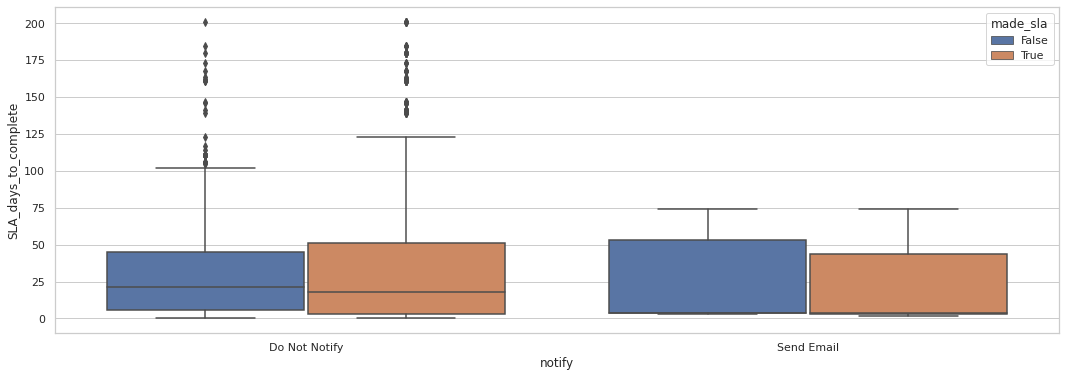

Do Not Notify    141588
Send Email          119
Name: notify, dtype: int64

In [487]:
# notify
plt.figure(figsize=(18,6))
sns.boxplot(data=new_df,x='notify',y='SLA_days_to_complete',hue='made_sla')
plt.xlabel("notify", size=12)
plt.ylabel("SLA_days_to_complete", size=12)
plt.show()

new_df.notify.value_counts()

Here also there is humge difference between notify and not notify but still there is no impact in SLA completion 

But there are lots of outliners to be taken care of

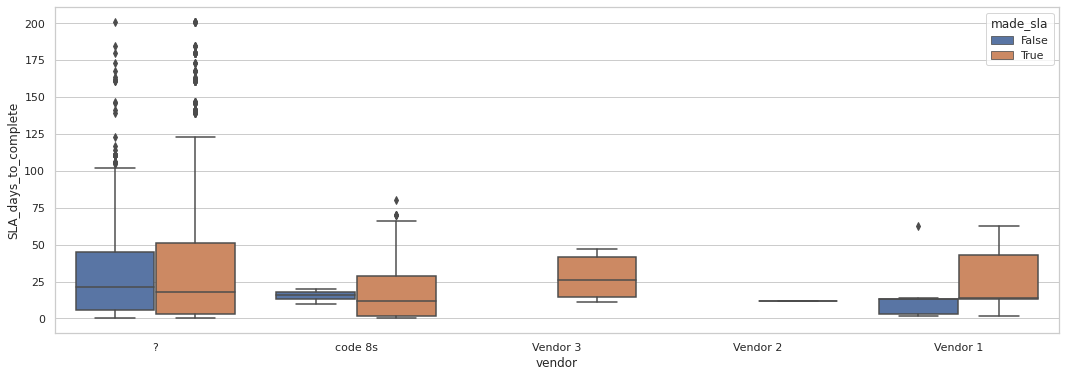

?           141463
code 8s        167
Vendor 1        69
Vendor 3         6
Vendor 2         2
Name: vendor, dtype: int64

In [488]:
# vendor
plt.figure(figsize=(18,6))
sns.boxplot(data=new_df,x='vendor',y='SLA_days_to_complete',hue='made_sla')
plt.xlabel("vendor", size=12)
plt.ylabel("SLA_days_to_complete", size=12)
plt.show()

new_df.vendor.value_counts()

Vendors 8s,3,2 and 1 are the getting SLA closed in time, whoe venders are not known are the one with maximum SLA breach


maximum venders are not known

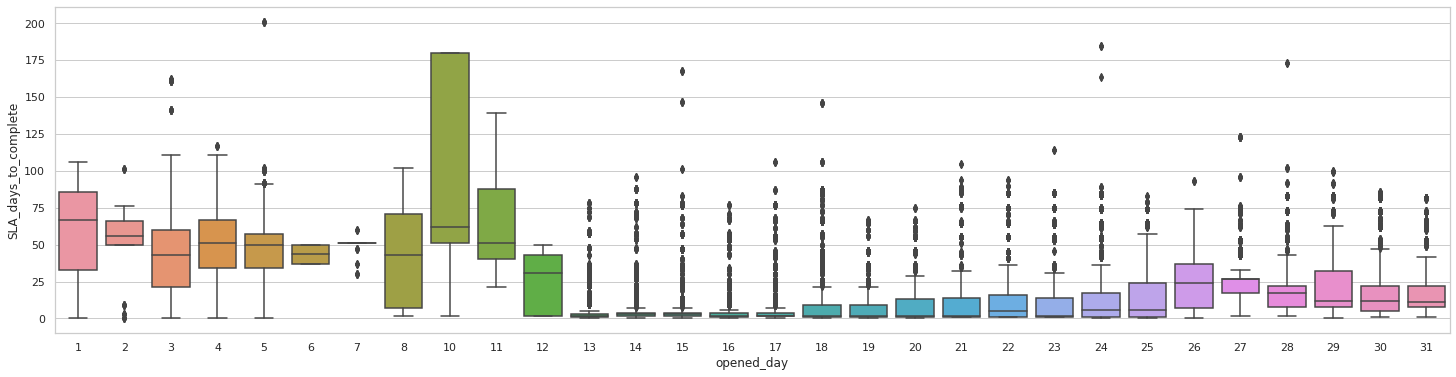

3     26597
5     18205
4     18155
18     6409
29     5374
14     5137
28     5018
15     4938
16     4663
30     4524
23     4433
17     4195
20     4009
25     3893
24     3869
13     3689
31     3565
19     3521
21     3119
22     2728
27     2452
26     2372
1       319
2       177
11       92
7        87
8        72
10       45
12       44
6         6
Name: opened_day, dtype: int64

In [489]:
# opened_day
plt.figure(figsize=(25,6))
sns.boxplot(data=new_df,x='opened_day',y='SLA_days_to_complete')
plt.xlabel("opened_day", size=12)
plt.ylabel("SLA_days_to_complete", size=12)
plt.show()

new_df.opened_day.value_counts()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


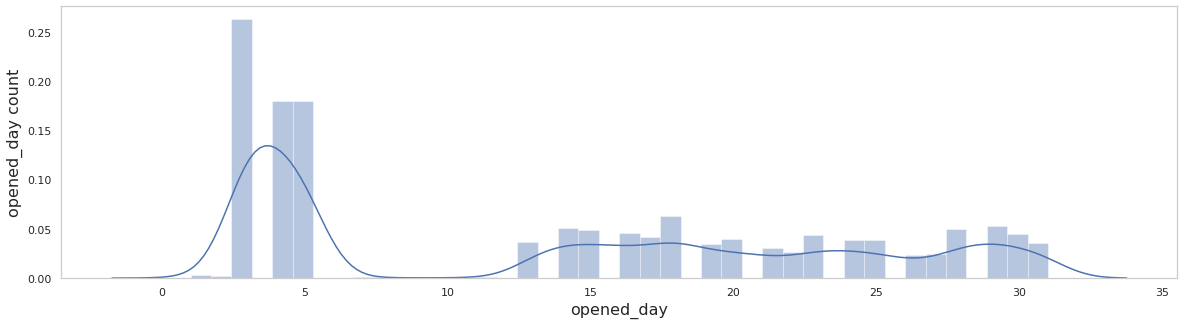

In [490]:
plt.figure(figsize=(20,5))
sns.distplot(new_df['opened_day'])
plt.xlabel("opened_day", size=16)
plt.ylabel("opened_day count", size=16)
plt.grid()
plt.show()

We can see that 3,4,5 then the maximum incidents are reported 

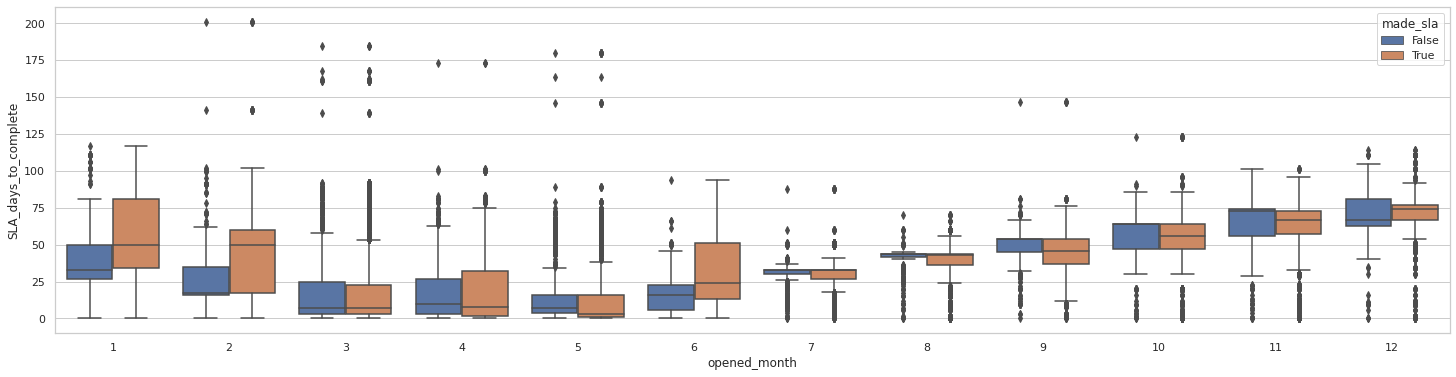

3     36419
4     31161
5     25430
2      7279
7      6924
11     6452
8      5480
1      5379
6      4455
9      4397
10     4260
12     4071
Name: opened_month, dtype: int64

In [491]:
# opened_month
plt.figure(figsize=(25,6))
sns.boxplot(data=new_df,x='opened_month',y='SLA_days_to_complete',hue='made_sla')
plt.xlabel("opened_month", size=12)
plt.ylabel("SLA_days_to_complete", size=12)
plt.show()

new_df.opened_month.value_counts()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


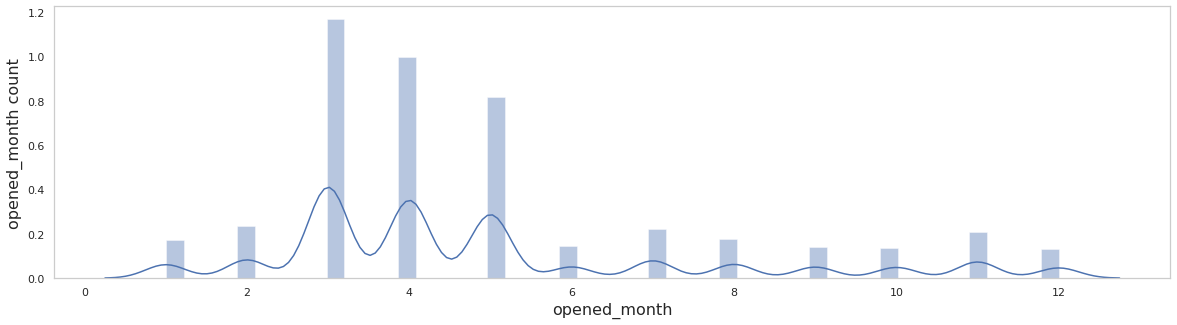

In [492]:
plt.figure(figsize=(20,5))
sns.distplot(new_df['opened_month'])
plt.xlabel("opened_month", size=16)
plt.ylabel("opened_month count", size=16)
plt.grid()
plt.show()

3,4,5 months are getting most incient numner and end of the year the incident count decrease

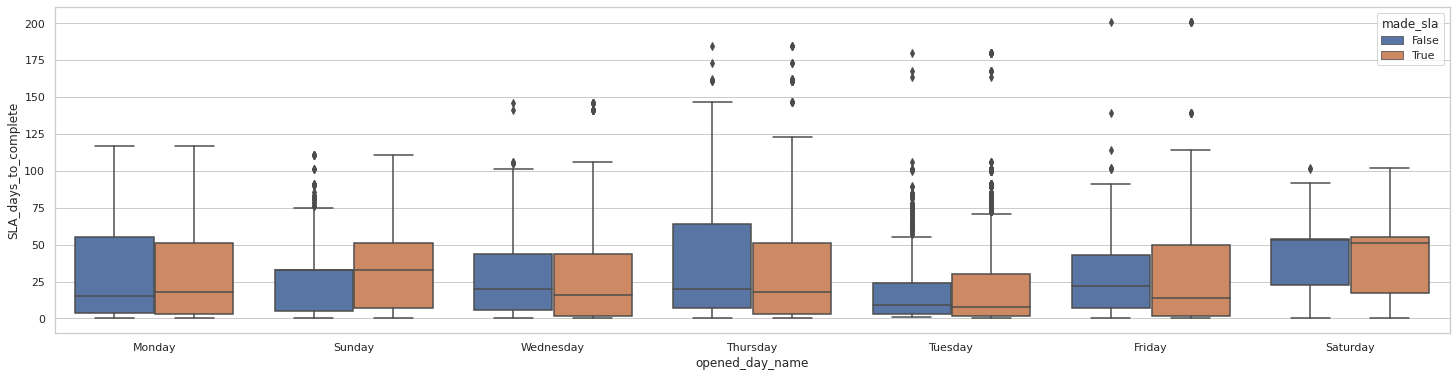

Monday       33054
Wednesday    26657
Thursday     22120
Tuesday      18673
Friday       15649
Sunday       15227
Saturday     10327
Name: opened_day_name, dtype: int64

In [493]:
#opened_day_name
plt.figure(figsize=(25,6))
sns.boxplot(data=new_df,x='opened_day_name',y='SLA_days_to_complete',hue='made_sla')
plt.xlabel("opened_day_name", size=12)
plt.ylabel("SLA_days_to_complete", size=12)
plt.show()

new_df.opened_day_name.value_counts()

We can see that indusrty is working all 7 days of weeks 

From the above EDA we can see one major issue of Outliners we need to take care of that first


##Handling outliners

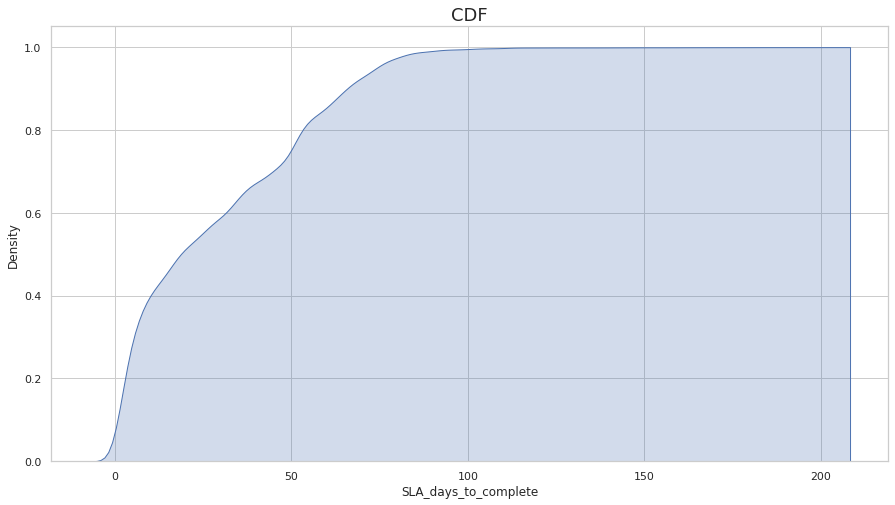

In [494]:
#CDF of SLA_days_to_complete 
plt.figure(figsize=(15,8))
sns.kdeplot(new_df['SLA_days_to_complete'], shade=True, cumulative=True)
plt.title('CDF',size = 18)
plt.show()

We can see that SLA days <100 is explaning 95% of Data.

mOre than that is just outliners

In [495]:
for i in np.arange(0,110,10):
  print('{}th percentile is {}'.format(i,np.percentile(new_df['SLA_days_to_complete'],i)))

0th percentile is 0.0
10th percentile is 1.0
20th percentile is 2.0
30th percentile is 4.0
40th percentile is 9.0
50th percentile is 18.0
60th percentile is 33.0
70th percentile is 44.0
80th percentile is 52.0
90th percentile is 66.0
100th percentile is 201.0


In [496]:
for i in np.arange(90,101,1):
  print('{}th percentile is {}'.format(i,np.percentile(new_df['SLA_days_to_complete'],i)))

90th percentile is 66.0
91th percentile is 67.0
92th percentile is 67.0
93th percentile is 71.0
94th percentile is 73.0
95th percentile is 74.0
96th percentile is 76.0
97th percentile is 77.0
98th percentile is 81.0
99th percentile is 91.0
100th percentile is 201.0


99 to 100 percentile is outliners as we can observe that there is huge jump in values they are just outlineras

We need to get rid of these

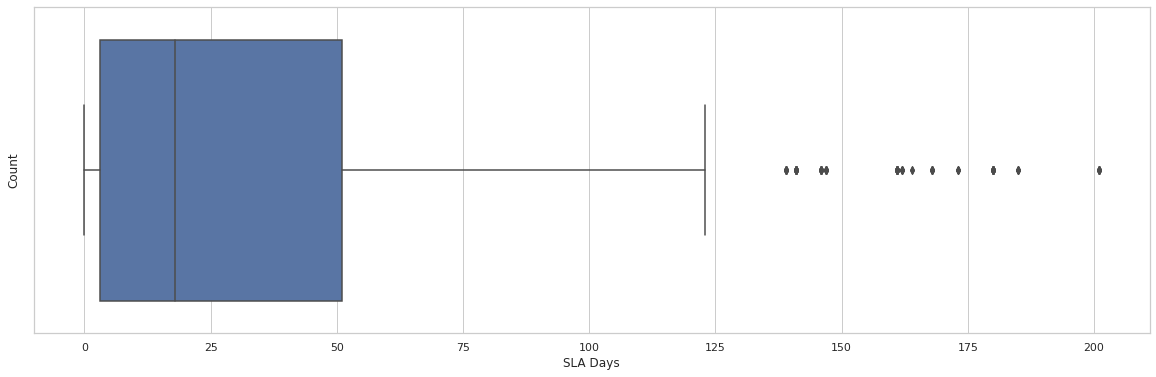

In [497]:
#SLA Days
plt.figure(figsize=(20,6))
sns.boxplot(data=new_df,x='SLA_days_to_complete')
plt.xlabel("SLA Days", size=12)
plt.ylabel("Count", size=12)
plt.show()


In [498]:
#Finding the values using boxplot
mean = np.round(np.mean(new_df['SLA_days_to_complete']), 2)
median = np.round(np.median(new_df['SLA_days_to_complete']), 2)
min_value = np.round(np.min(new_df['SLA_days_to_complete']),2)
max_value = np.round(np.max(new_df['SLA_days_to_complete']),2)
q_1 = np.round(new_df['SLA_days_to_complete'].quantile(0.25), 2)
q_3 = np.round(new_df['SLA_days_to_complete'].quantile(0.75), 2)
print('mean',mean)
print('median',median)
print('min value',min_value)
print('max value',max_value)
print('Q1',q_1)
print('Q3',q_3)

mean 27.46
median 18.0
min value 0
max value 201
Q1 3.0
Q3 51.0


In [499]:
# Interquartile range
iqr = np.round(q_3 - q_1, 2)
print(iqr)

48.0


In [500]:
#select inter quantile range
data_df=new_df[new_df['SLA_days_to_complete']> 0].reset_index(drop=True)
data_df=new_df[new_df['SLA_days_to_complete']< (q_3+iqr)].reset_index(drop=True)

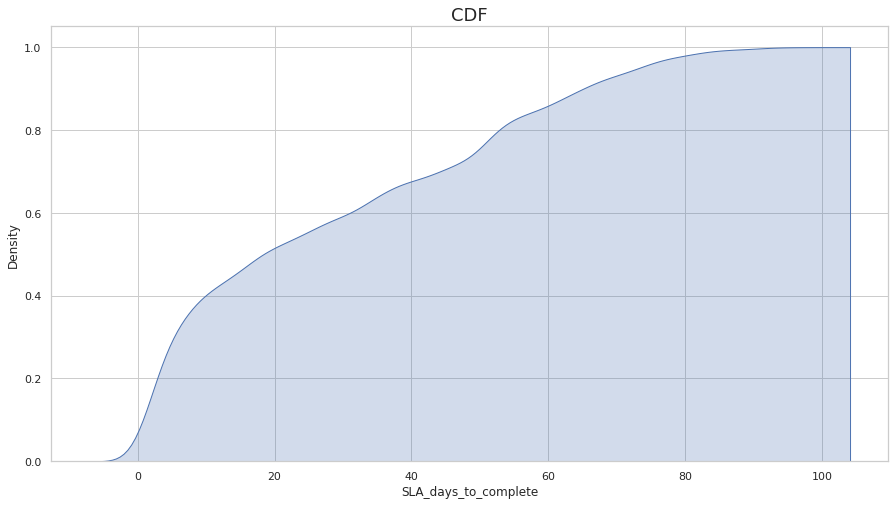

In [501]:
#new CDF of SLA_days_to_complete 
plt.figure(figsize=(15,8))
sns.kdeplot(data_df['SLA_days_to_complete'], shade=True, cumulative=True)
plt.title('CDF',size = 18)
plt.show()

##Saving Model

In [502]:
data_df.shape

(140929, 24)

In [503]:
data_df.to_csv('/content/drive/MyDrive/dataset_link/CS1.zip',index=False)